In [1]:
import os
from tqdm import tqdm
import warnings

# analysis
import numpy as np
import pandas as pd
from sklearn import metrics
from scipy.stats import fisher_exact

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# import functions from plotting_analysis.py
from plotting_analysis import *

# surpress recurring warning about xticklabels
warnings.filterwarnings("ignore", message="^.*set_ticklabels().*$")

# folder with data
folder_data = './data/'

### Overview ###
All non-schematic figures used in the paper are generated with the code in this notebook and saved in `./figures`. Figures used in the SI are saved in `./figures/figures_SI`. The underlying functions are imported from `plotting_analysis.py`. All processed data used to generate the figures is saved in `./data`, and input files and scripts neccesary to rerun the data are saved in `./generate_data`. For each figure, a short explanation is given what input files, scripts, data, and functions where used to generate the final figures.

### Figure 2 ###
For Fig 2, the raw data is generated by the `scramble_colab.py` or `scramble_esmf.py` scripts, which randomly scramble a given sequence with a given percentage of random AA tokens and fold the structure using either colabfold or ESMFold. 50 SCOPe domains considered designable in AF2 ss are used as input. The native proteins and exact scrambled sequences for the native proteins used in the results below is reported in `scramble_50prot_combined.fa`. 8 proteinMPNN designs were generated for each of the 50 proteins, and the scrambling was repeated for the best pMPNN sequences. The native pMPNN designs and exact scrambled sequences for the pMPNN designs used in the results below is reported in `scramble_50prot_pMPNN_combined.fa`. The output .csv files containing the pLDDT and scRMSD for each of the scrambled sequences are named `scrambled_aggregated_results[...].csv` and are used to calculate designability different pLDDT cutoffs with the `make_des_for_diff_plddt()` function, which outputs a list of dataframes. The list of dataframes is used to plot the curves with the  `lineplot_des_plddt_as_3()` function.

19500it [00:02, 7598.70it/s]
19500it [00:07, 2545.46it/s]
19500it [00:07, 2544.76it/s]
19500it [00:02, 7565.87it/s]
19500it [00:07, 2575.78it/s]
19500it [00:07, 2581.17it/s]
19500it [00:02, 7753.83it/s]
19500it [00:08, 2404.54it/s]
19500it [00:07, 2467.11it/s]
19500it [00:02, 7124.45it/s]
19500it [00:08, 2306.15it/s]
19500it [00:07, 2533.05it/s]
19500it [00:02, 7698.74it/s]
19500it [00:07, 2546.44it/s]
19500it [00:07, 2515.29it/s]
19500it [00:02, 7700.90it/s]
19500it [00:07, 2544.99it/s]
19500it [00:07, 2540.44it/s]
19500it [00:02, 7669.31it/s]
19500it [00:07, 2564.71it/s]
19500it [00:07, 2561.72it/s]


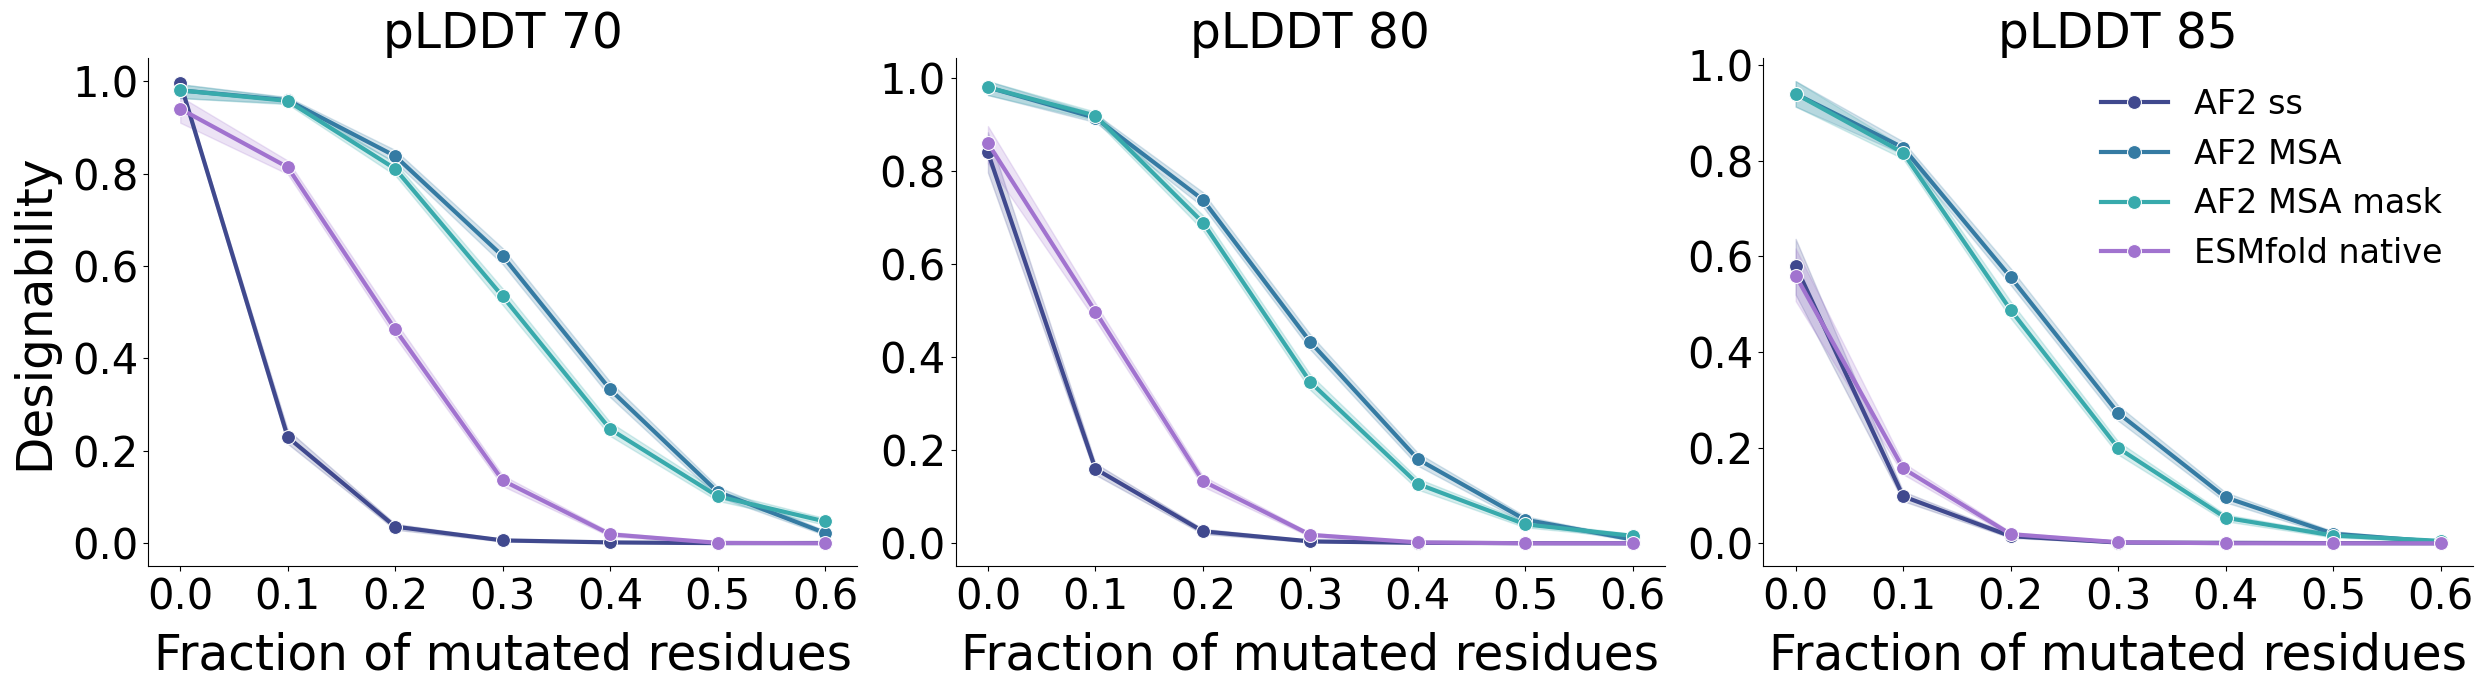

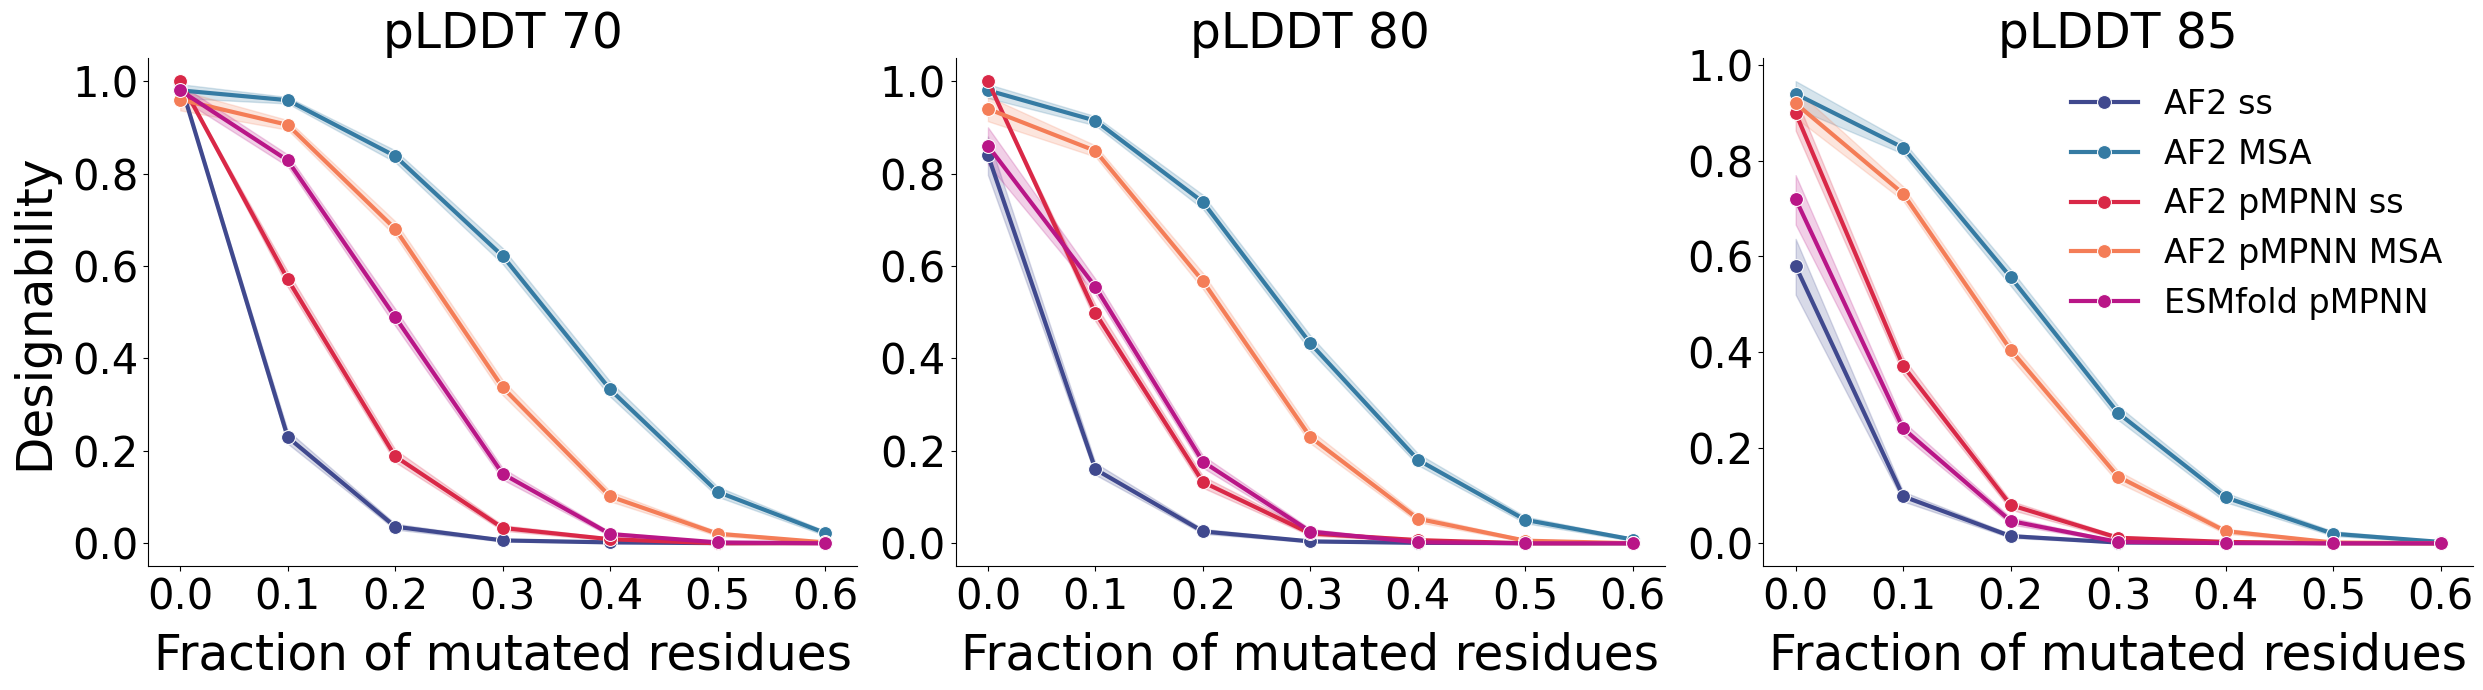

In [19]:
# ==============================
# Fig 2 — Scramble experiment
# ==============================

# native
af2_ss_scr_meta = pd.read_csv(os.path.join(folder_data, 'scrambled_aggregated_results_af2_ss_correct.csv'))
af2_msa_scr_meta = pd.read_csv(os.path.join(folder_data, 'scrambled_aggregated_results_af2_msa_correct.csv'))
af2_msa_masked_scr_meta = pd.read_csv(os.path.join(folder_data, 'scrambled_aggregated_results_af2_msa_masked_correct.csv'))
af2_esmf_scr_meta = pd.read_csv(os.path.join(folder_data, 'scrambled_aggregated_results_emsf_correct_combined.csv'))

# pmpnn
af2_ss_scr_mpnn = pd.read_csv(os.path.join(folder_data, 'scrambled_aggregated_results_pmpnn_ss.csv'))
af2_msa_scr_mpnn = pd.read_csv(os.path.join(folder_data, 'scrambled_aggregated_results_pmpnn_msa.csv'))
af2_esmf_scr_mpnn = pd.read_csv(os.path.join(folder_data, 'scrambled_aggregated_results_pmpnn_esmf.csv'))

# load remainder of the data similarly to plot the lineplot.
list_dfs_ss = make_des_for_diff_plddt(af2_ss_scr_meta)
list_dfs_msa = make_des_for_diff_plddt(af2_msa_scr_meta)
list_dfs_msa_masked = make_des_for_diff_plddt(af2_msa_masked_scr_meta)
list_dfs_esmf = make_des_for_diff_plddt(af2_esmf_scr_meta)
list_dfs_pmpnn_ss = make_des_for_diff_plddt(af2_ss_scr_mpnn)
list_dfs_pmpnn_msa = make_des_for_diff_plddt(af2_msa_scr_mpnn)
list_dfs_pmpnn_esmf = make_des_for_diff_plddt(af2_esmf_scr_mpnn)

# plot scramble curve for native sequences
palette = sns.color_palette('mako', n_colors=5).as_hex()[1:4]+['#A173CF']
list_dfs=[list_dfs_ss, list_dfs_msa, list_dfs_msa_masked, list_dfs_esmf]
label_models = ['AF2 ss', 'AF2 MSA', 'AF2 MSA mask', 'ESMfold native']
lineplot_des_plddt_as_3(list_dfs, folder_outputs='./figures', output_name='Fig-2-native_scr.png',
                        label_models=label_models,fontsize_label=35, fontsize_ticks=30, palette=palette) 

# plot scramble curve for pMPNN sequences
palette_pmpnn = sns.color_palette('rocket', n_colors=10).as_hex()[::-1]
palette = sns.color_palette('mako', n_colors=5).as_hex()[1:3]+[palette_pmpnn[4], palette_pmpnn[2], '#B91687']
list_dfs=[list_dfs_ss, list_dfs_msa, list_dfs_pmpnn_ss, list_dfs_pmpnn_msa, list_dfs_pmpnn_esmf]
label_models = ['AF2 ss', 'AF2 MSA', 'AF2 pMPNN ss','AF2 pMPNN MSA', 'ESMfold pMPNN']
lineplot_des_plddt_as_3(list_dfs, folder_outputs='./figures', output_name='Fig-2-pMPNN_scr.png',
                        label_models=label_models,fontsize_label=35, fontsize_ticks=30, palette=palette) 

### Figure 3 ###
For Fig 3, The raw data is generated by running the listed structure prediction methods for all of the sequences given in `allbenchmarks2.fa` with either 3 or 48 recycles. The results are concatenated into one .csv file for each combination of structure prediction method/recycle number. Experimental outcomes are extracted from literature and saved in `Benchmark_experimental.csv`. The data is loaded in and the ROC AUC scores are calculated and aggregated using `aggregate_df_barplot()` function. The result is plotted using `plot_bar_metrics_overlap()`, with the two different recycle options overlapping for easy comparison. The length of each sequence is reported in `Benchmark_seqlengths.csv` and plotted using the `plot_length()` function. The median per-residue Neff is calculated using `get_neff_per_seq.py` on the MSA files calculated for each sequence in `allbenchmarks2.fa`. The results are saved in `Benchmark_Neff-medres.csv`, and plotted using the `plot_Neff()` function.

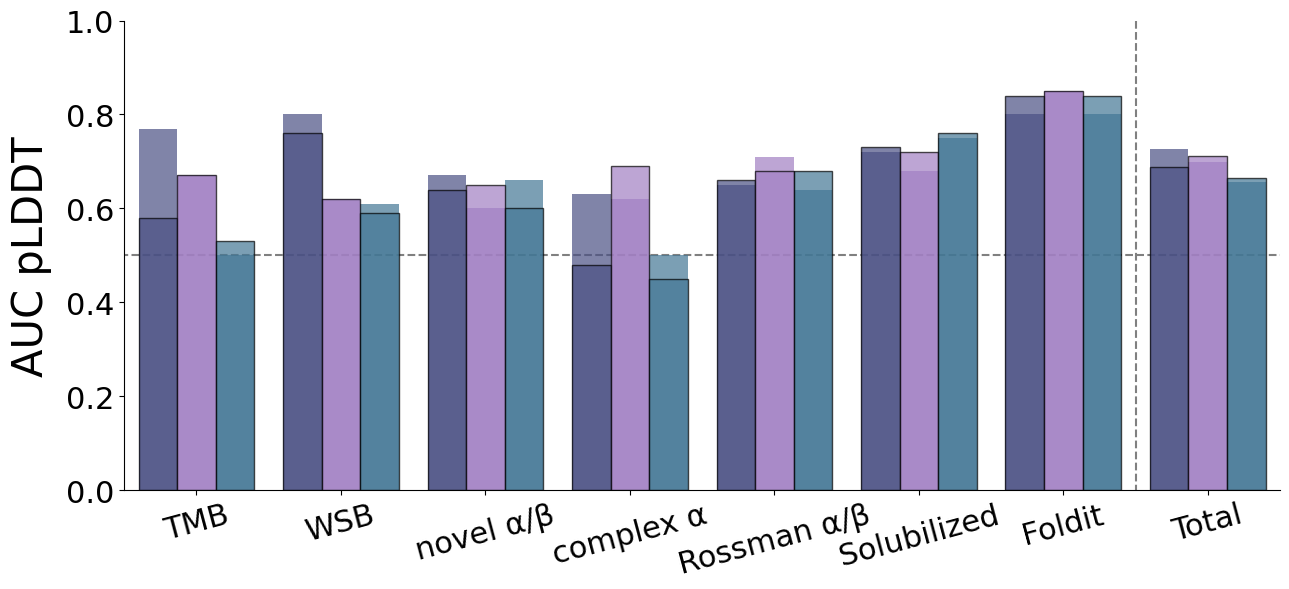

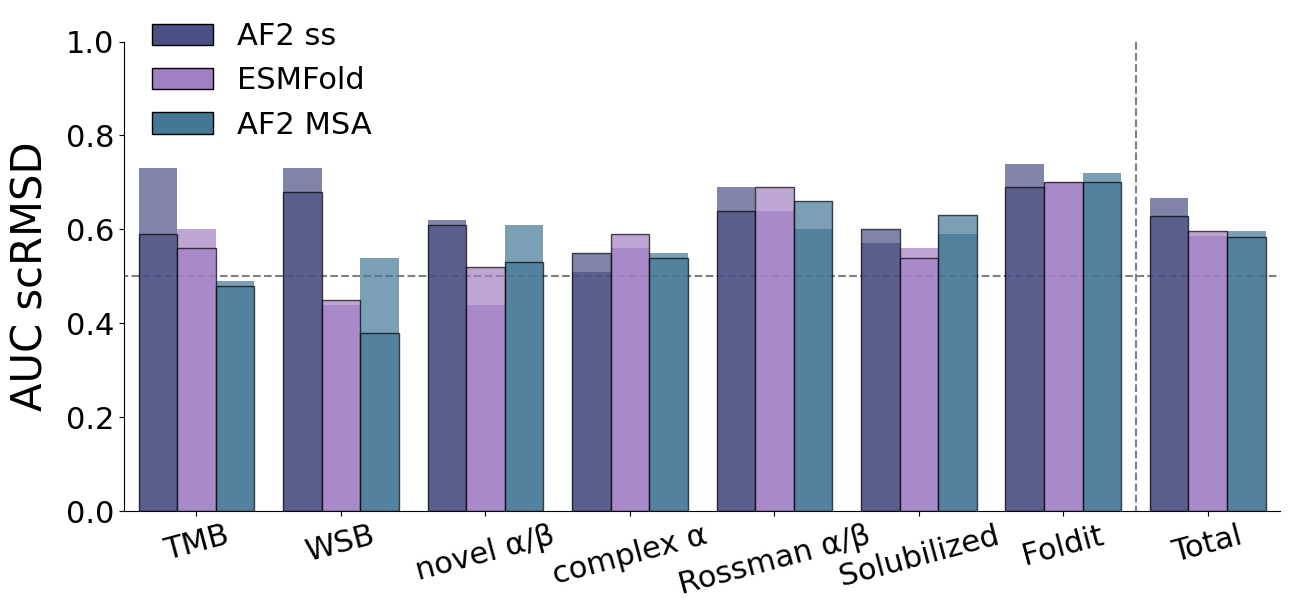

<Figure size 1300x600 with 0 Axes>

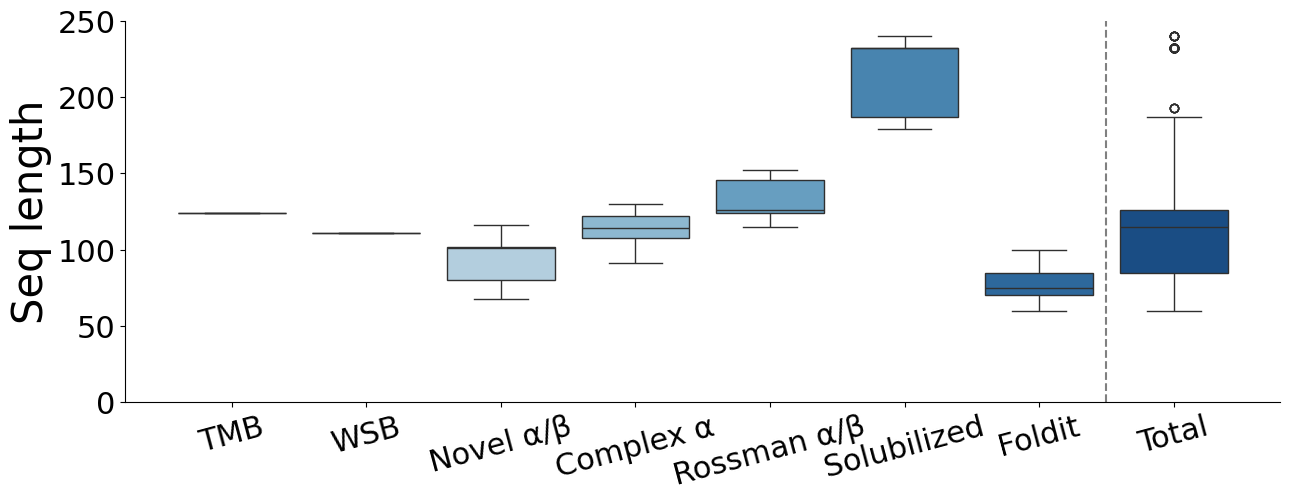

<Figure size 1300x600 with 0 Axes>

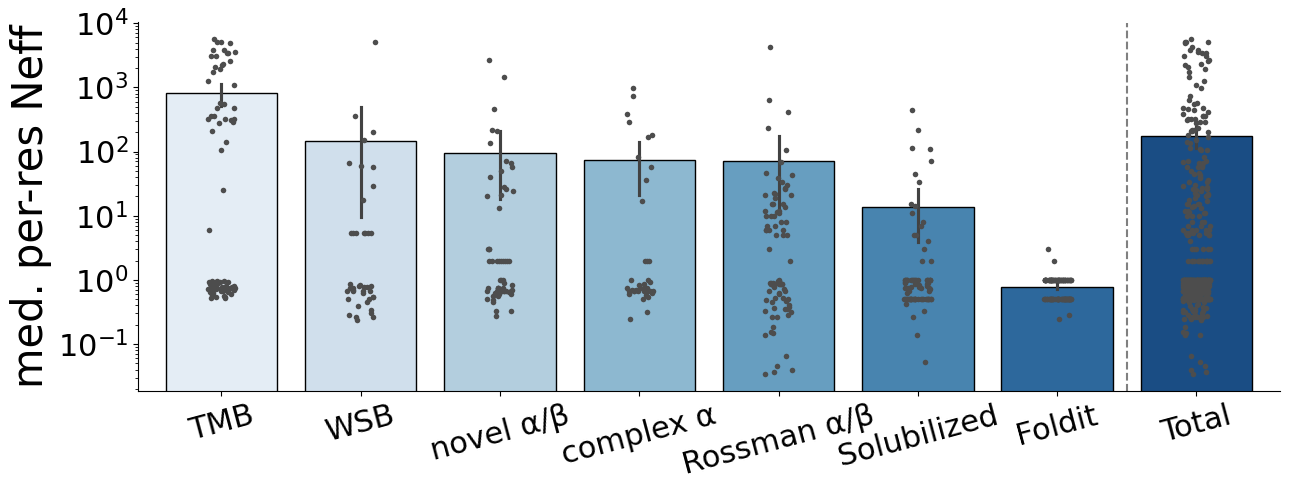

In [115]:
# ==============================
# Fig 3 — Experimental benchmark
# ==============================

# load in data for 3 recycles
df_benchmark_re3_ss = pd.read_csv(os.path.join(folder_data, 'Benchmark_AF2_ss_re3.csv'), index_col=0)
df_benchmark_re3_msa = pd.read_csv(os.path.join(folder_data, 'Benchmark_AF2_msa_re3.csv'), index_col=0)
df_benchmark_re3_esmf = pd.read_csv(os.path.join(folder_data, 'Benchmark_ESMFold_re3.csv'), index_col=0)
# load in data for 48 recycles
df_benchmark_re48_ss = pd.read_csv(os.path.join(folder_data, 'Benchmark_AF2_ss_re48.csv'), index_col=0)
df_benchmark_re48_msa = pd.read_csv(os.path.join(folder_data, 'Benchmark_AF2_msa_re48.csv'), index_col=0)
df_benchmark_re48_esmf = pd.read_csv(os.path.join(folder_data, 'Benchmark_ESMFold_re48.csv'), index_col=0)
# load in experimental data
df_benchmark_exp = pd.read_csv(os.path.join(folder_data, 'Benchmark_experimental.csv'), index_col=0)

# prepare data
dataset_order = ['TMB','WSB','novel ⍺/β','complex ⍺','Rossman ⍺/β','Solubilized','Foldit']
dfs_re3_dataset = [df_benchmark_re3_ss, df_benchmark_re3_esmf, df_benchmark_re3_msa]
dfs_re48_dataset = [df_benchmark_re48_ss, df_benchmark_re48_esmf, df_benchmark_re48_msa]
dfs_re3 = aggregate_df_barplot(dfs_re3_dataset, dataset_order, df_benchmark_exp)
dfs_re48 = aggregate_df_barplot(dfs_re48_dataset, dataset_order, df_benchmark_exp)

# plot figures
plot_bar_metrics_overlap(dfs_re3, dfs_re48, metric='AUC pLDDT', legend=False,
                         folder_outputs='./figures', name_out='Fig-3-auc-plddt-benchmarks-3re-48re.png')
plot_bar_metrics_overlap(dfs_re3, dfs_re48, metric='AUC scRMSD',
                         folder_outputs='./figures', name_out='Fig-3-auc-rmsd-benchmarks-3re-48re.png')

# plot length distribution 
df_benchmark_length = pd.read_csv(os.path.join(folder_data,'Benchmark_seqlengths.csv'), index_col=0)
dataset_order_2 = ['TMB','WSB','Novel α/β','Complex α','Rossman α/β','Solubilized','Foldit', 'Total']
df_benchmark_length = pd.concat([df_benchmark_length[df_benchmark_length.name ==i] for i in dataset_order_2], ignore_index=True)
plot_length(df_benchmark_length, folder_outputs='./figures', name='Fig-3-benchmark-length.png')

# plot Neff distribution
df_benchmark_neff = pd.read_csv(os.path.join(folder_data, 'Benchmark_Neff-medres.csv'))
plot_Neff(df_benchmark_neff, folder_outputs='./figures', name='Fig-3-benchmark-Neff.png')

### Figure 4 ###
For Fig 4, The raw data is generated by running the `run_pMPNN_colab_batch.py` script on a set of directories containing cleaned .pdb files matching each SCOPe sequence. The script generates 8 proteinMPNN sequences per structure, and uses AF2 ss as the folding model to refold the native sequence and 8 redesigned sequences and calculate designability metrics as described in methods 4.6. The sequences of the SCOPe entries and corresponding pMPNN designs are reported in `SCOPe-designs-complete.csv`. The data on the designability of the refolded native sequences and pMPNN designs is saved in `SCOPe40-mpnn-colab-08-10-25.csv`. This data is loaded in and any proteins with breaks, SCOPe classes e/f/g, or large repetitive protein folds are excluded. The `lineplots_lens_combined()` function plots the designability over different length bins. The `make_df_bar_secstruct()` function calculates the secondary structure composition of this data, which is plotted using the `bar_des_undes_secstruct()` function. The `get_flat_dist()` function finds the largest flat distribution within the data for a given set of bins for each SCOPe class, and the designability of these selections are plotted using the `barplot_fold_des()` function.

<Figure size 640x480 with 0 Axes>

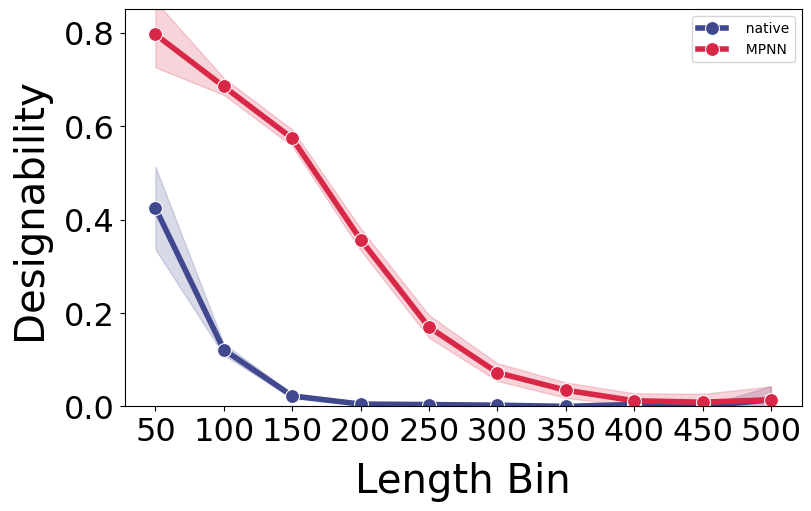

<Figure size 640x480 with 0 Axes>

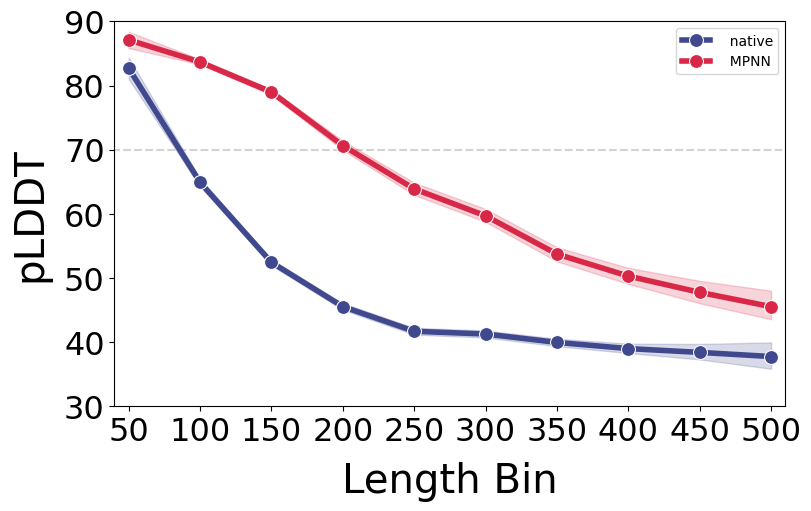

<Figure size 640x480 with 0 Axes>

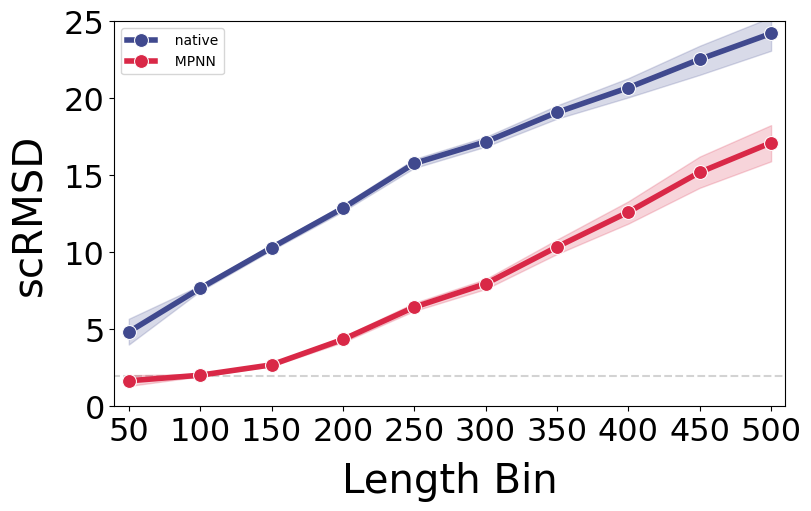

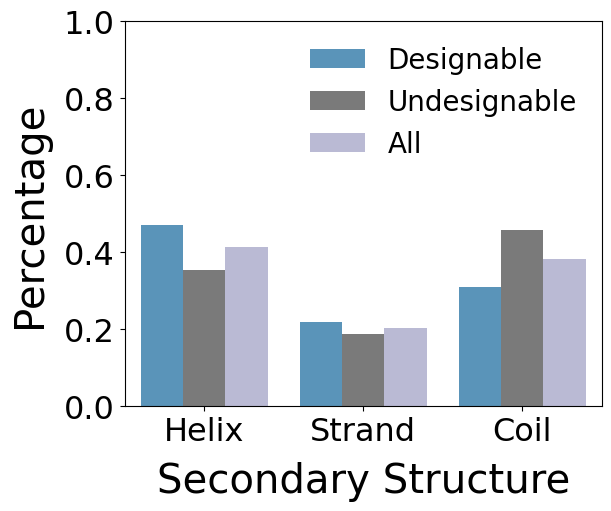

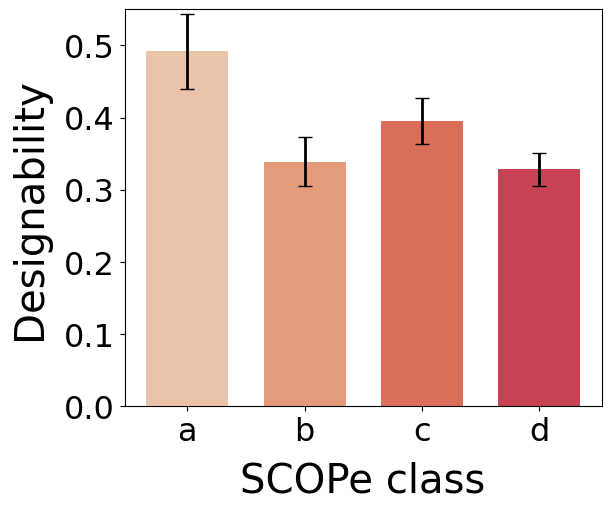

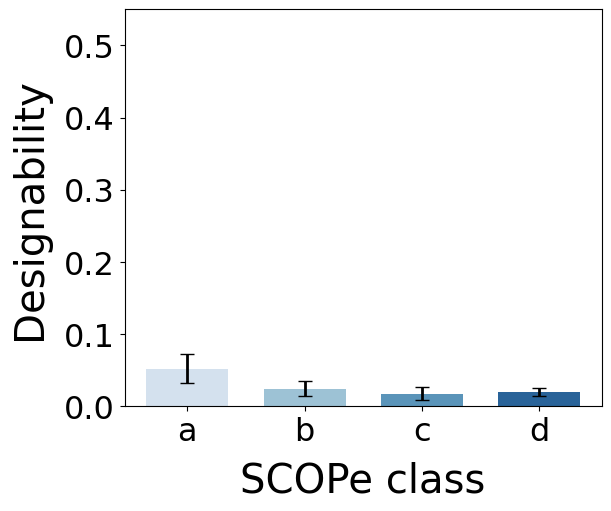

In [116]:
# ==============================
# Fig 4 — Scope analysis
# ==============================

# load in SCOPe data
metadata_scope_full = pd.read_csv(os.path.join(folder_data, 'SCOPe40-mpnn-colab-08-10-25.csv'), index_col=0)
metadata_scope_full = metadata_scope_full[~metadata_scope_full.breaks] # exclude breaks
metadata_scope_full = metadata_scope_full[[not i in ['a.118', 'b.69'] for i in metadata_scope_full.scop_id.values]] # exclude repetitive folds
metadata_scope_full = metadata_scope_full[~metadata_scope_full['scop_class'].isin(['e', 'f', 'g'])].copy() # exclude e f g classes
metadata_scope_full = add_secstr_pct(metadata_scope_full) 

# plot designability as function of length
lineplots_lens_combined(metadata_scope_full, metrics=['wt_designable', 'designable'], 
                        folder_outputs='./figures', name='Fig-4-designability-length-per-class.png')
# plot pLDDT as a function of length
lineplots_lens_combined(metadata_scope_full, metrics=['plddtWT', 'plddt'], 
                        folder_outputs='./figures', name='Fig-4-plddt-length-per-class.png')
# plot scRMSD as a function of length
lineplots_lens_combined(metadata_scope_full, metrics=['rmsdWT', 'rmsd'], 
                        folder_outputs='./figures', name='Fig-4-rmsd-length-per-class.png')

# get designable and undesignable SCOPe entries
scop_ids_designable   = metadata_scope_full[metadata_scope_full['wt_designable'] == 1].copy()
scop_ids_undesignable = metadata_scope_full[metadata_scope_full['wt_designable'] == 0].copy()
# calculate secondary structure composition of designable and undesingable entries
plot_df = make_df_bar_secstruct(scop_ids_undesignable, scop_ids_designable)
bar_des_undes_secstruct(plot_df, folder_outputs='./figures', name='Fig-4-designablity-secstr.png')

# get indices for flat class distributions of either pMPNN or WT sequences
bins = np.linspace(60, 300, 15)
index_flat = get_flat_dist(metadata_scope_full, bins)
index_flat_wt = get_flat_dist(metadata_scope_full, bins)

# plot pMPNN per class designability
barplot_fold_des(metadata_scope_full.loc[index_flat], bootstrap=True, col='designable',
                folder_outputs='./figures', name='Fig-4-designablity-pMPNN-scope.png')
# plot WT per class designability
barplot_fold_des(metadata_scope_full.loc[index_flat_wt], bootstrap=True, col='wt_designable',
                 folder_outputs='./figures', name='Fig-4-designablity-WT-scope.png')

### Figure 5 ###
For Fig 5a The raw data is generated by running the `run_pMPNN_esmf_batch.py`. The script generates 8 proteinMPNN sequences per structure, and uses ESMFold as the folding model to refold the sequences and calculate designability metrics as described in methods 4.6. To compare the difference between PDB structures and known or unkown AFDB structures, the script was run on 3 different datasets: 1000 randomly selected cluster representatives from dark clusters with pLDDT >= 80, the sequences + designs of which have been saved in `darkclust_seqs_pMPNN_combined.fa`, 1000 randomly selected non-dark clusters with pLDDT >= 80, the sequences + designs of which have been saved in `lightclust_seqs_pMPNN_combined.fa`, and 1000 SCOPe domains with a similar length distribution as the dark clusters, the sequences + designs of which have been saved in `scopesmf_seqs_pMPNN_combined.fa`. The resulting designabilities are plotted using the `plot_bars_designability()` function. For Fig 5d-g, a 1000 single chain SCOPe domains have been selected where there is a 5-50 AA difference in length between the AFDB and the PDB. These sequences and their corresponding pMPNN designs have been saved as `attenuation-[...]_seqs_pMPNN_combined.fa`. The designability of the 1000 proteins based on either their PDB structures, their full length AFDB structures, or the AFDB structures attenuated to PDB length are saved as `Realignment-methods-[...].csv`, which further include columns with alternative methods for recalculating the scRMSD. The designabilities are plotted using the `plot_bars_designability()` function. How designability is affected by changes in the underlying pLDDT and scRMSD metrics is plotted using the `plot_paramspace_att()` function. The designabilities resulting from using alternative scRMSD methods are compiled using the `make_df_realignment()` function, and plotted using the `plot_bar_realignment()` function.




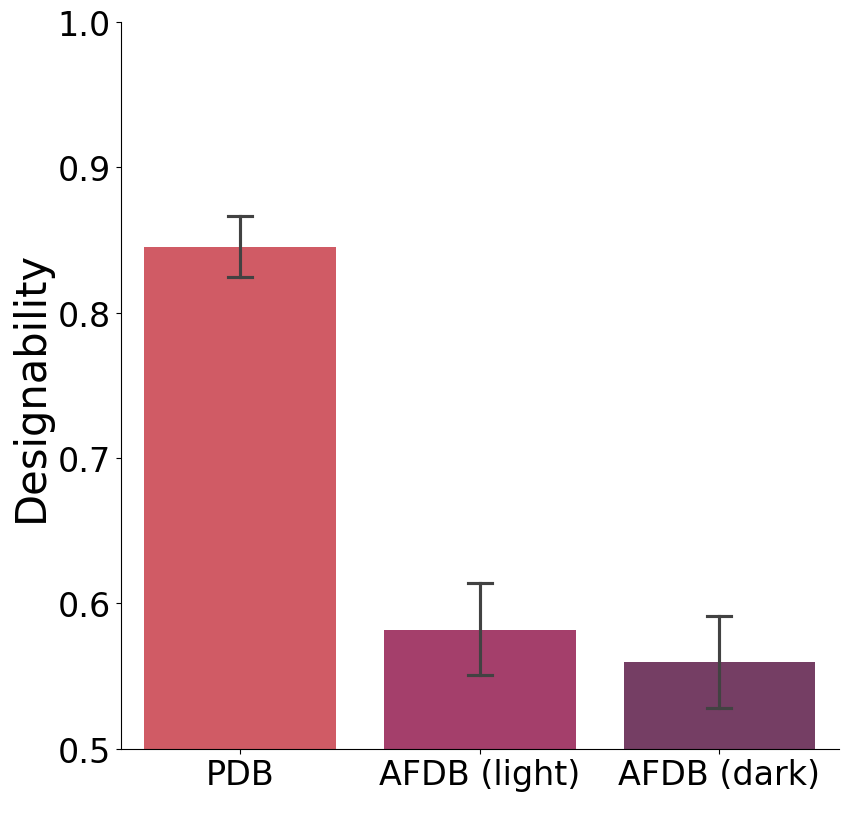

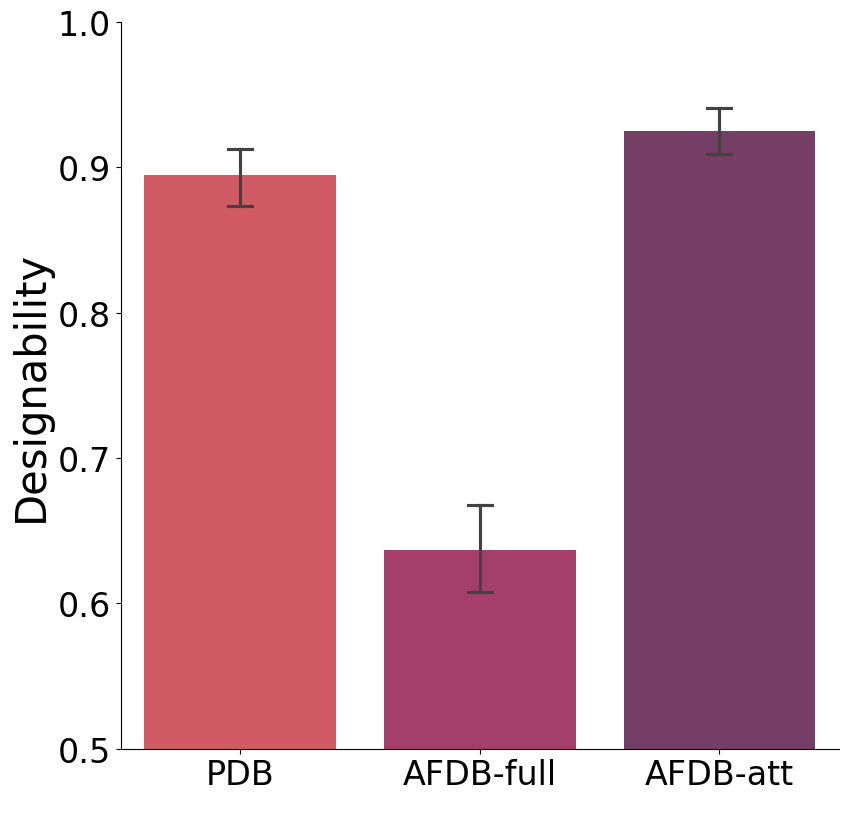

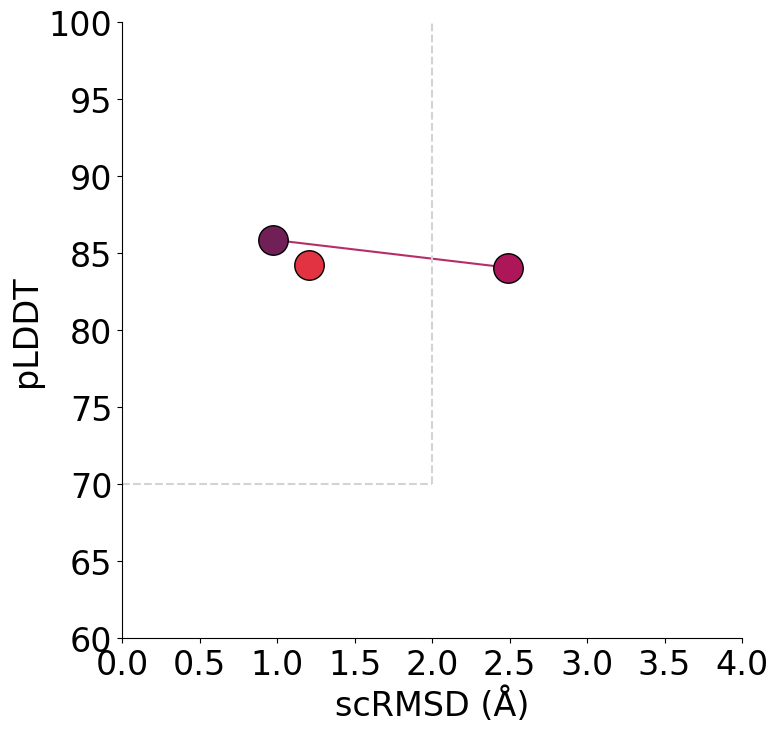

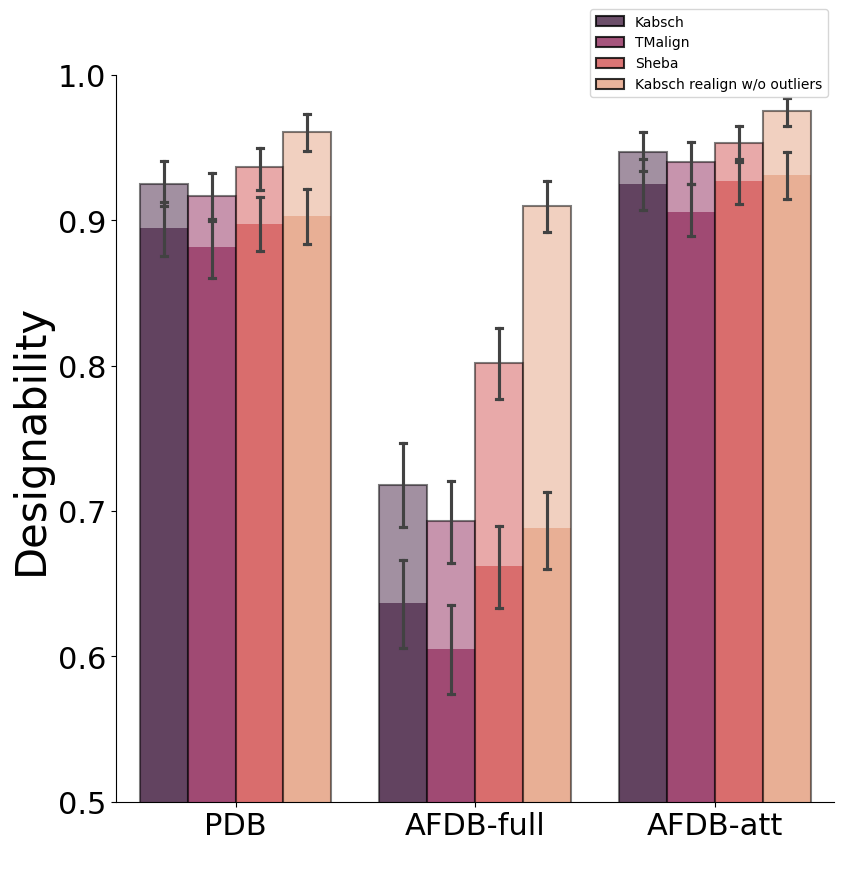

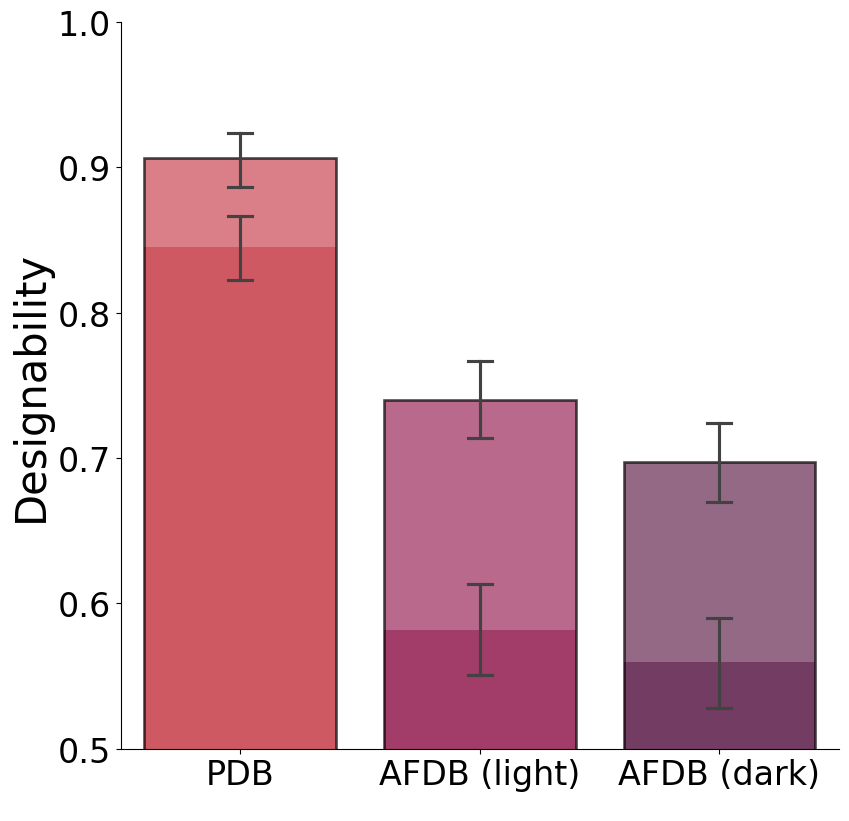

In [117]:
# ==============================
# Fig 5 — Flexible regions
# ==============================

# load in data for PDB vs light clusters vs dark clusters
lightclust_1000 = pd.read_csv(os.path.join(folder_data, 'Designability_lightclust_data_mpnn.csv'), index_col=0)
darkclust_1000 = pd.read_csv(os.path.join(folder_data,'Designability_darkclust_data_mpnn.csv'), index_col=0)
scope_esmf_1000 = pd.read_csv(os.path.join(folder_data,'Designability_scopesmf_data_mpnn.csv'), index_col=0)
lightdark_concat = pd.concat([scope_esmf_1000, lightclust_1000, darkclust_1000])

# plot light vs dark clusters
plot_bars_designability(lightdark_concat, metric='designable',
                        folder_outputs='./figures', name='Fig-5-designablity-lightdark.png')

# load in data for attenuation experiment
df_pdb_rmsd = pd.read_csv(os.path.join(folder_data, 'Realignment-methods-PDB-AFDB.csv'), index_col=0)
df_afdb_rmsd = pd.read_csv(os.path.join(folder_data, 'Realignment-methods-AFDB-full.csv'), index_col=0)
df_att_rmsd = pd.read_csv(os.path.join(folder_data, 'Realignment-methods-AFDB-att.csv'), index_col=0)

# plot attenuation experiment
df_rmsd_combined = make_df_realignment([df_pdb_rmsd, df_afdb_rmsd, df_att_rmsd], ['PDB', 'AFDB-full', 'AFDB-att'], ['designable'])
plot_bars_designability(df_rmsd_combined, metric='Designable',
                        folder_outputs='./figures', name='Fig-5-designablity-attenuation.png')

# plot changes in plDDT and RMSD during attenuation experiment
plot_paramspace_att(df_pdb_rmsd, df_afdb_rmsd, df_att_rmsd, folder_outputs='./figures',name='Fig-5-plddt-rmsd-paramspace-att.png')

# plot designability of attenuation experiment after various (re)alignment methods
order_mean = ['designable', 'designable_tm','designable_sheba', 'designable_w']
order_median = ['designable_m', 'designable_tm_m','designable_sheba_m','designable_w_m']
df_rmsd_combined_mean = make_df_realignment([df_pdb_rmsd, df_afdb_rmsd, df_att_rmsd], ['PDB', 'AFDB-full', 'AFDB-att'], order_mean)
df_rmsd_combined_med  = make_df_realignment([df_pdb_rmsd, df_afdb_rmsd, df_att_rmsd], ['PDB', 'AFDB-full', 'AFDB-att'], order_median)
plot_bar_realignment(df_rmsd_combined_mean, df_rmsd_combined_med, folder_outputs='./figures', name='Fig-5-designability-realignment-methods.png')

# plot light vs dark clusters before and after using best realignment method
plot_bars_designability_overlap(lightdark_concat, metrics=['designable', 'designable_w'],
                        folder_outputs='./figures', name='Fig-5-designablity-lightdark.png')

### Figure S1-S2 ###
For Figure S1, the raw data is generated using the 50 designable proteins used for the scramble experiment (the native sequenes in `scramble_50prot_combined.fa`) and the 50 best pMPNN redesigns of those proteins (the native sequences in `scramble_50prot_pMPNN_combined.fa`). The MSAs for these sequences are calculated and analyzed using `get_neff_per_seq.py`. The results are plotted as a barplot directly. For Figure S2, the pLDDT and scRMSD metrics calculated for `scramble_50prot_combined.fa` and `scramble_50prot_pMPNN_combined.fa` are plotted as a function of scramble percentage directly. 



19500it [00:02, 7446.88it/s]
19500it [00:08, 2392.05it/s]
19500it [00:07, 2502.02it/s]
19500it [00:02, 7446.36it/s]
19500it [00:08, 2404.15it/s]
19500it [00:07, 2455.71it/s]


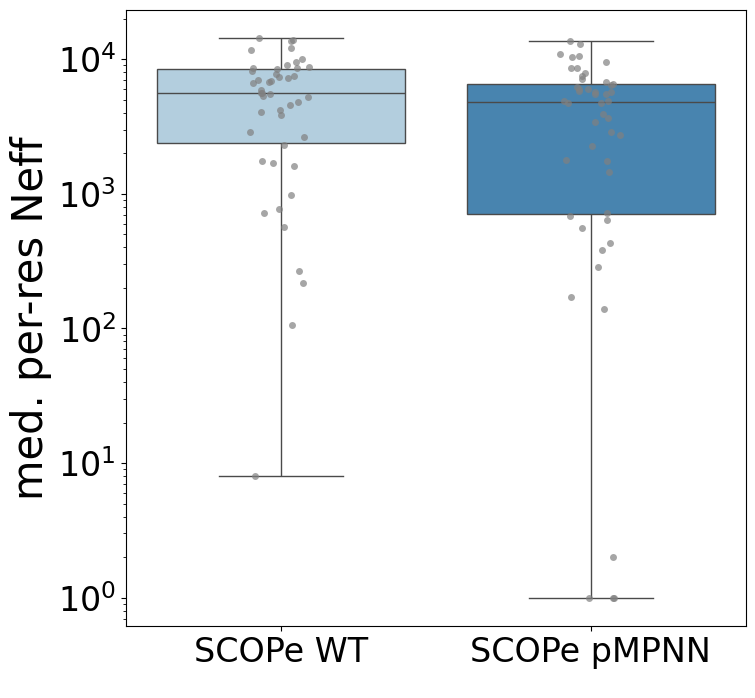

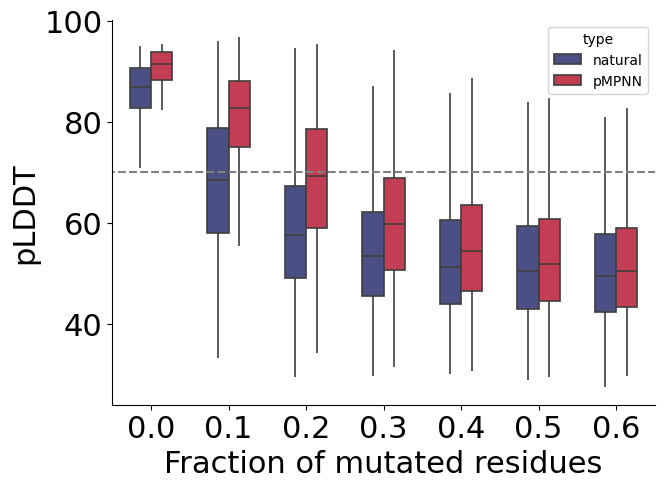

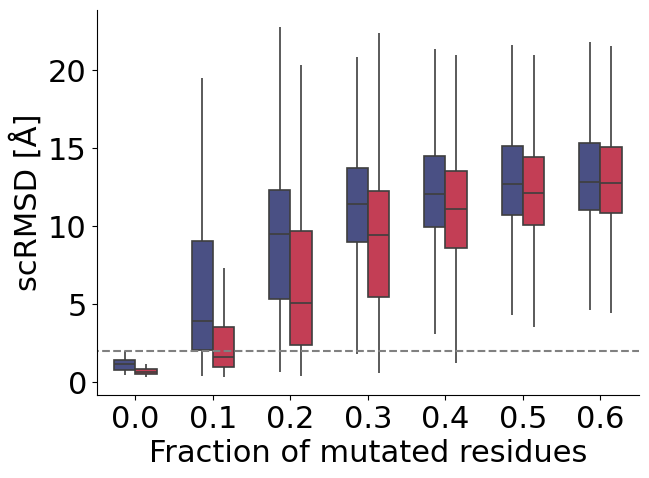

In [114]:
# ==============================
# Fig S1-2 — Scramble stats 
# ==============================

# scramble msa depth
# load data Neff
df_nat = pd.read_csv(os.path.join(folder_data, 'Neff_total_native.csv'), index_col=0)
df_mpnn = pd.read_csv(os.path.join(folder_data, 'Neff_total_mpnn.csv'), index_col=0)
#combine dataframes
df_nat['type'] = len(df_nat)*['SCOPe WT']
df_mpnn['type'] = len(df_mpnn)*['SCOPe pMPNN']
df_total = pd.concat([df_nat, df_mpnn], ignore_index=True)
#plot figure
plt.figure(figsize=(8,8))
sns.boxplot(data=df_total, x='type', y='neff_res_med', hue='type', palette='Blues')
sns.stripplot(data=df_total, x='type', y='neff_res_med', color='grey', alpha=0.7)
plt.ylabel('med. per-res Neff', fontsize=30)
plt.xlabel(' ')
plt.yscale('log')
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.savefig(os.path.join('.', 'figures', 'figures_SI', 'Fig-S1-msadepth-Neff-50prots.png'), dpi=300, bbox_inches='tight')


# scramble plddt/rmsd
af2_ss_scr_meta = pd.read_csv(os.path.join(folder_data, 'scrambled_aggregated_results_af2_ss_correct.csv'))
af2_ss_scr_mpnn = pd.read_csv(os.path.join(folder_data, 'scrambled_aggregated_results_pmpnn_ss.csv'))
# load remainder of the data similarly to plot the lineplot.
list_dfs_ss = make_des_for_diff_plddt(af2_ss_scr_meta)
list_dfs_pmpnn_ss = make_des_for_diff_plddt(af2_ss_scr_mpnn)
# combine dataframes
df_ss_70 = list_dfs_ss[0]
df_ss_70_wt = af2_ss_scr_meta[af2_ss_scr_meta.header == 'native'].copy()
df_ss_70['type'] = len(df_ss_70)*['natural']
df_ss_70_wt['type'] = len(df_ss_70_wt)*['natural']
df_ss_mpnn_70 = list_dfs_pmpnn_ss[0]
df_ss_mpnn_70_wt = af2_ss_scr_mpnn[af2_ss_scr_mpnn.header == 'native'].copy()
df_ss_mpnn_70['type'] = len(df_ss_mpnn_70)*['pMPNN']
df_ss_mpnn_70_wt['type'] = len(df_ss_mpnn_70_wt)*['pMPNN']
data_af2ss = pd.concat([df_ss_70_wt, df_ss_70, df_ss_mpnn_70_wt, df_ss_mpnn_70])
data_af2ss['scr_pctg_2'] = [float(i.split('_')[-1]) if not j == 'native' else 0 for i, j in zip(data_af2ss.scr_pctg.values, data_af2ss.header.values)]
# plot figure for pLDDT
palette = ['#40498e', '#d92847']
plt.figure(figsize=(7,5))
sns.boxplot(data_af2ss, x='scr_pctg_2', y='plddt', hue='type', palette=palette,
            showfliers=False, width=0.55, linewidth=1.2,  showcaps=False)
plt.hlines(70, -1, 10, color='grey', linestyle='dashed')
plt.xlim(-0.5, 6.5)
plt.xticks(fontsize=22)
plt.yticks(ticks=[40,60,80,100], fontsize=22)
plt.xlabel('Fraction of mutated residues', fontsize=22)
plt.ylabel('pLDDT', fontsize=22)
sns.despine()
plt.savefig(os.path.join('.', 'figures', 'figures_SI', 'Fig-S2-scramble_plddt.png'), dpi=300, bbox_inches='tight')
plt.show()
# plot figure for scRMSD
plt.figure(figsize=(7,5))
sns.boxplot(data_af2ss, x='scr_pctg_2', y='sc_rmsd', hue='type', palette=palette,
            showfliers=False, width=0.55, linewidth=1.2,  showcaps=False, legend=False)
plt.hlines(2, -1, 10, color='grey', linestyle='dashed')
plt.xlim(-0.5, 6.5)
plt.xticks(fontsize=22)
plt.yticks(ticks=[0, 5,10,15,20], fontsize=22)
plt.xlabel('Fraction of mutated residues', fontsize=22)
plt.ylabel('scRMSD [Å]', fontsize=22)
sns.despine()
plt.savefig(os.path.join('.', 'figures', 'figures_SI', 'Fig-S2-scramble_rmsd.png'), dpi=300, bbox_inches='tight')
plt.show()

### Figure S3 ###
For Fig S3, a selection is made from the SoluProtDB dataset (The full SoluProtDB set is given in `soluprot_training_set.csv`). To find corresponding crystal structures, the sequences from this dataset have been BLASTed against the PDB. The results of this BLAST search have been saved in `soluprot_real_hits_training_set.tsv`, and the sequence length of these matches has been saved in `soluprot_lengths.csv`. Using the `match_selection()` function, the length distribution of the larger set of soluble proteins is matched to the length distribution of the much smaller set of insoluble proteins. Since this matching process involves a random selection both a histogram of an example re-selection, and two histograms showing either absolute count or density for the selection used in the SI figure are given. 


0
1
2
9.0 111.4
21 75
111.4 213.8
30 222
213.8 316.20000000000005
78 223
316.20000000000005 418.6
27 156
418.6 521.0
30 79
521.0 623.4000000000001
27 25
623.4000000000001 725.8000000000001
6 19
930.6 1033.0
3 4
222


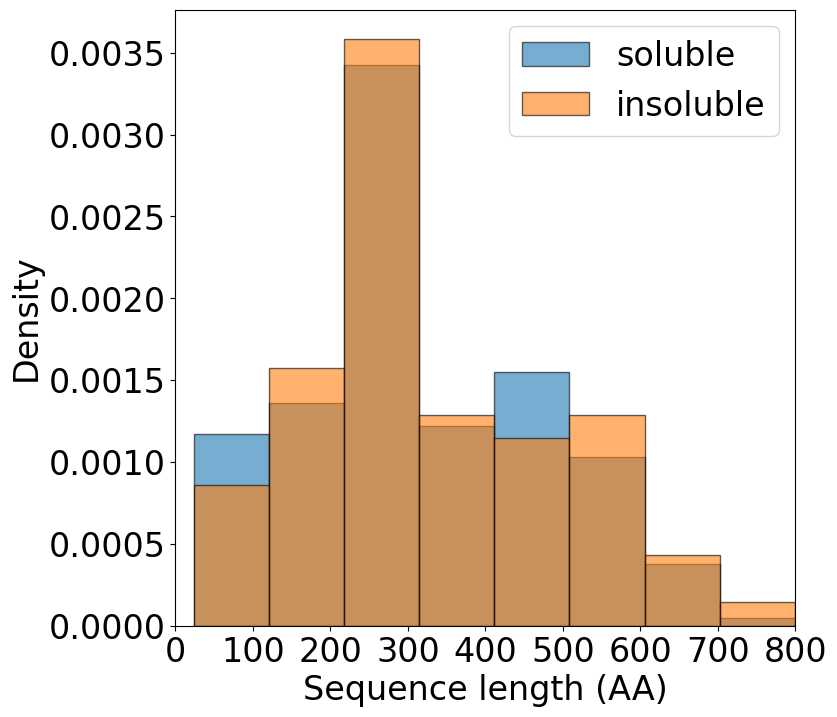

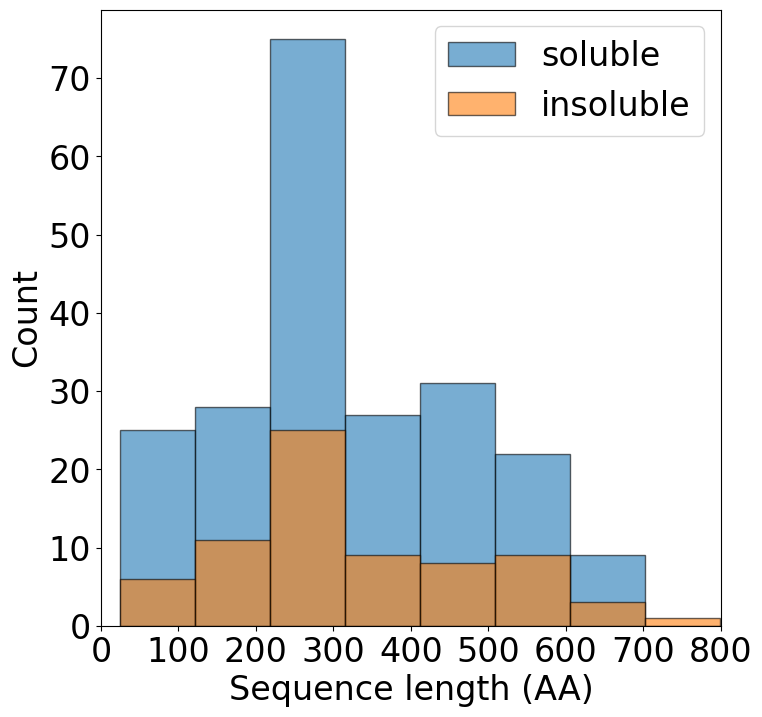

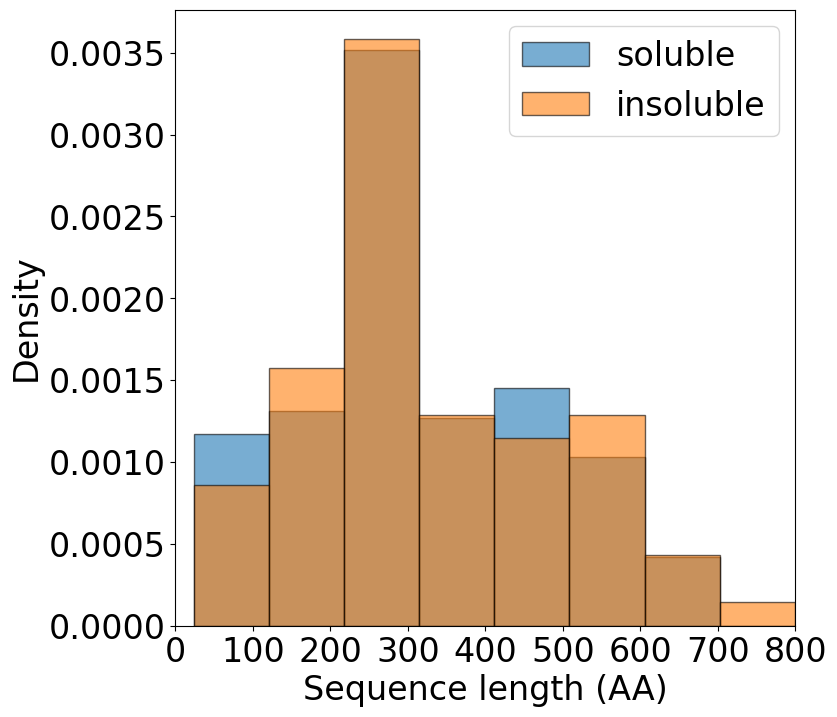

In [287]:
# ==============================
# Fig S3 — Select Soluprot data 
# ==============================

# example: randomly reselect matching length distribution
soluprot_trainingset = pd.read_csv(os.path.join(folder_data, 'soluprot_training_set.csv'), index_col=0)
soluprot_len = pd.read_csv(os.path.join(folder_data, 'soluprot_lengths.csv'), index_col=0)
ind_sel = match_selection(soluprot_len[soluprot_len.solubility == 0].length.values, soluprot_len[soluprot_len.solubility == 1].length.values)
c ,b = np.histogram(soluprot_len[soluprot_len.solubility == 0].length.values, bins=10)

plt.figure(figsize=(8,8))
a,b,c= plt.hist(soluprot_len[soluprot_len.solubility == 1].length.values[ind_sel], bins=10, alpha=0.6, label='soluble', lw=1, ec='black', density=True)
plt.hist(soluprot_len[soluprot_len.solubility == 0].length.values, bins=b, alpha=0.6, label='insoluble', lw=1, ec='black', density=True)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim(0,800)
plt.ylabel('Density', fontsize=24)
plt.xlabel('Sequence length (AA)', fontsize=24)
plt.legend(fontsize=24)
plt.savefig(os.path.join('.', 'figures', 'figures_SI', 'Fig-S3-length-dist-new.png'), dpi=300, bbox_inches='tight')
plt.show()

# selection used in the paper, randomselected using the same method as above
df_sol = pd.read_csv(os.path.join(folder_data, "soluprot_solubility_selected.csv"))
df_sol = df_sol.loc[df_sol.index[::-1]]
df_sol.index = df_sol.sid.values

plt.figure(figsize=(8,8))
a,b,c= plt.hist(soluprot_len.loc[df_sol[df_sol.solubility == 1].index].length.values, 
                bins=b, alpha=0.6, label='soluble', lw=1, ec='black')
plt.hist(soluprot_len.loc[df_sol[df_sol.solubility == 0].index].length.values, 
         bins=b, alpha=0.6, label='insoluble', lw=1, ec='black')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim(0,800)
plt.ylabel('Count', fontsize=24)
plt.xlabel('Sequence length (AA)', fontsize=24)
plt.legend(fontsize=24)
plt.savefig(os.path.join('.', 'figures', 'figures_SI', 'Fig-S3-length-dist-sel-abs.png'), dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8,8))
a,b,c= plt.hist(soluprot_len.loc[df_sol[df_sol.solubility == 1].index].length.values,
                bins=10, alpha=0.6, label='soluble', lw=1, ec='black', density=True)
plt.hist(soluprot_len.loc[df_sol[df_sol.solubility == 0].index].length.values,
         bins=b, alpha=0.6, label='insoluble', lw=1, ec='black', density=True)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim(0,800)
plt.ylabel('Density', fontsize=24)
plt.xlabel('Sequence length (AA)', fontsize=24)
plt.legend(fontsize=24)
plt.savefig(os.path.join('.', 'figures', 'figures_SI', 'Fig-S3-length-dist-sel-dens.png'), dpi=300, bbox_inches='tight')
plt.show()

### Figure S4-5 ###
For Fig S4, the SoluProt sequences selected in Fig S3 are run using AF2 ss, AF2 MSA, and ESMFold. The results are saved in the .csv files named `soluprot_plddt_rmsd_[...].csv`. The data is loaded in and designability, pLDDT and scRMSD are plotted using the `plot_violin_soluprot_rmsd()`, `plot_violin_soluprot_plddt()` and `plot_bars_soluprot_des()` functions respectively, the latter of which also reports significance between the soluble and insoluble sets calculated using Fisher's exact test. For Fig S5, 1000 random proteins are selected from `soluprot_training_set.csv` without requiring a crystal structure to be available. The 1000 selected proteins are saved in `soluprot_rnd_subset_1k.tsv`. The selected sequences are run using AF2 ss, AF2 MSA, and ESMFold, and the resulting pLDDT values are plotted using the `plot_violin_soluprot_nopdb()` function.

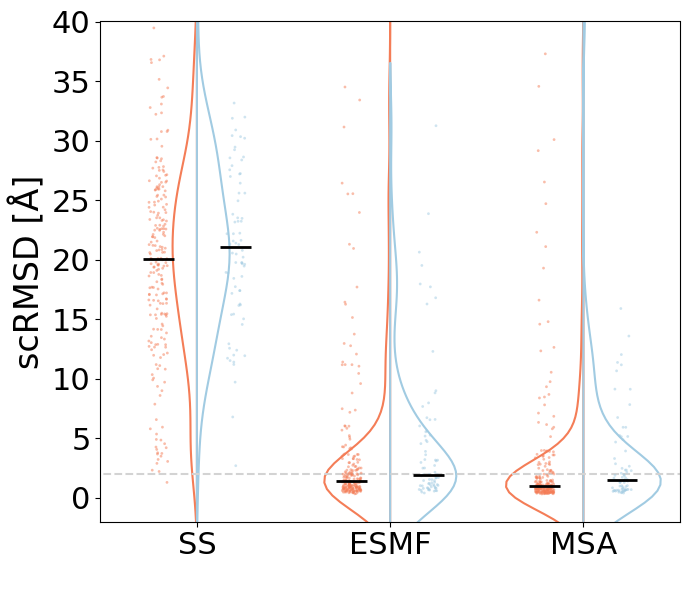

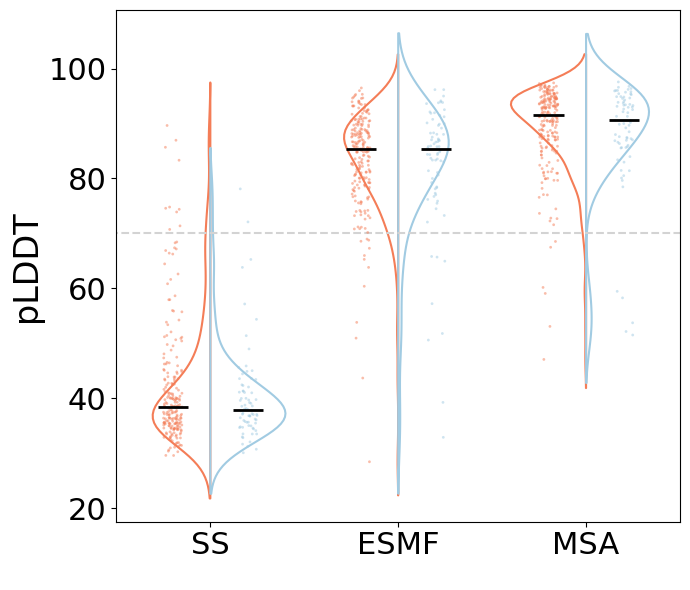

SS SignificanceResult(statistic=0.0, pvalue=1.0)
ESMF SignificanceResult(statistic=0.6901918976545842, pvalue=0.17397065825208538)
MSA SignificanceResult(statistic=0.6066907775768535, pvalue=0.10425181913333448)


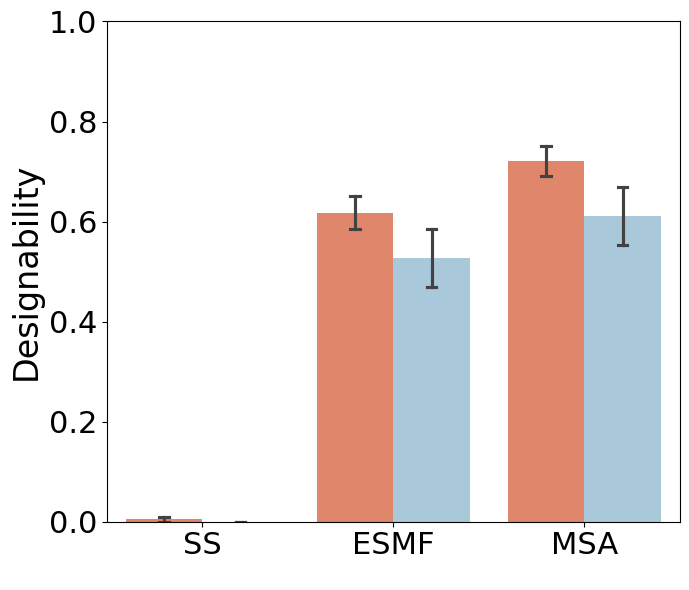

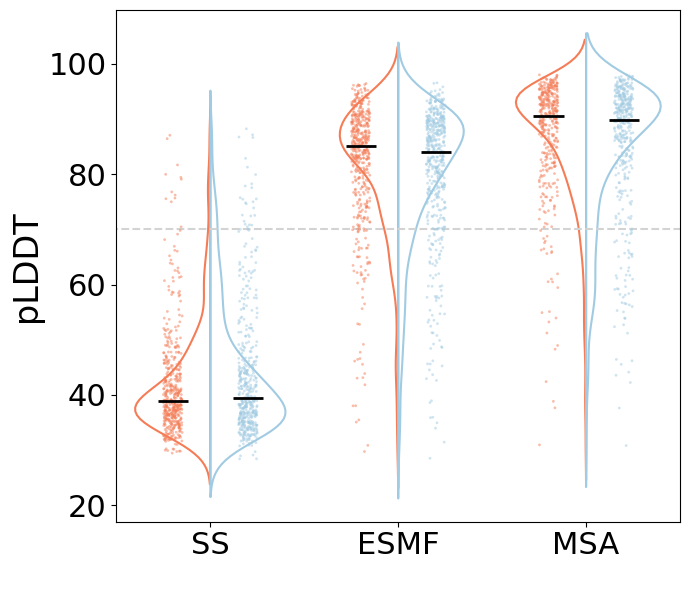

In [153]:
# ==============================
# Fig S4-5 — Plot Soluprot data 
# ==============================

# Read data preselected with method described above
df_sol = pd.read_csv(os.path.join(folder_data, "soluprot_solubility_selected.csv"))
df_sol = df_sol.loc[df_sol.index[::-1]]
df_sol.index = df_sol.sid.values

df_esmf_sol = pd.read_csv(os.path.join(folder_data,'soluprot_plddt_rmsd_align_esmf.csv'))
df_esmf_sol['sid'] = [i.split('_')[1] for i in df_esmf_sol.filename.values]
df_esmf_sol.index = df_esmf_sol.sid.values.astype(int)
ind_esmf = [i for i in df_esmf_sol.index if i in df_sol.sid.values]

df_ss_sol = pd.read_csv(os.path.join(folder_data,'soluprot_plddt_rmsd_align_ss.csv'))
df_ss_sol['sid'] = [i.split('_')[1] for i in df_ss_sol.filename.values]
df_ss_sol.index = df_ss_sol.sid.values.astype(int)
ind_ss = [i for i in df_ss_sol.index if i in df_sol.sid.values]

df_msa_sol = pd.read_csv(os.path.join(folder_data,'soluprot_plddt_rmsd_align_msa.csv'))
df_msa_sol['sid'] = [i.split('_')[1] for i in df_msa_sol.filename.values]
df_msa_sol.index = df_msa_sol.sid.values.astype(int)
ind_msa = [i for i in df_msa_sol.index if i in df_sol.sid.values]

df_sol['rmsd_esmf'] = len(df_sol)*[np.nan]
df_sol['rmsd_ss'] = len(df_sol)*[np.nan]
df_sol['rmsd_msa'] = len(df_sol)*[np.nan]

df_sol.loc[ind_esmf, 'rmsd_esmf'] = df_esmf_sol.loc[ind_esmf].rmsd.values
df_sol.loc[ind_ss, 'rmsd_ss'] = df_ss_sol.loc[ind_ss].rmsd.values
df_sol.loc[ind_msa, 'rmsd_msa'] = df_msa_sol.loc[ind_msa].rmsd.values

df_sol.loc[ind_esmf, 'plddt_esmf'] = df_esmf_sol.loc[ind_esmf].plddt.values
df_sol.loc[ind_ss, 'plddt_ss'] = df_ss_sol.loc[ind_ss].plddt.values
df_sol.loc[ind_msa, 'plddt_msa'] = df_msa_sol.loc[ind_msa].plddt.values

# plot designability
plot_violin_soluprot_rmsd(df_sol, name_out=os.path.join('.','figures','figures_SI','Fig-S4-Soluprot_sel_scRMSD.png'))
plot_violin_soluprot_plddt(df_sol, name_out=os.path.join('.','figures','figures_SI','Fig-S4-Soluprot_sel_pLDDT.png'))
plot_bars_soluprot_des(df_sol, name_out=os.path.join('.','figures','figures_SI','Fig-S4-Soluprot_sel_des.png'))

#plot 1000 test proteins
nopdb_ss = pd.read_csv(os.path.join(folder_data, 'soluprot_nopdb_plddt_ss.csv'), )
nopdb_esmf = pd.read_csv(os.path.join(folder_data, 'soluprot_nopdb_plddt_esmf.csv'), )
nopdb_msa = pd.read_csv(os.path.join(folder_data, 'soluprot_nopdb_plddt_msa.csv'),)
data = {'pLDDT':np.concatenate([nopdb_ss.plddt.values, nopdb_esmf.plddt.values, nopdb_msa.plddt.values]),
        'Solubility':np.concatenate([soluprot_trainingset.loc[nopdb_ss.prot.values].solubility.values,
                                 soluprot_trainingset.loc[nopdb_esmf.prot.values].solubility.values,
                                 soluprot_trainingset.loc[nopdb_msa.prot.values].solubility.values]),
        'type':len(nopdb_ss)*['SS']+len(nopdb_esmf)*['ESMF']+len(nopdb_msa)*['MSA']}
df_plot_nopdb = pd.DataFrame(data)
plot_violin_soluprot_nopdb(df_plot_nopdb, name_out=os.path.join('.', 'figures','figures_SI', 'Fig-S5-Soluprot_nopdb_pLDDT.png'))


### Figure S6 ###
For Fig S6, The same data reported in Fig. S3 was used, now investigating the effect of different thresholds rather than using the threshold insensitive ROC AUC scores. Thresholds were optimized for either F1 or precision using the `optimize_cutoff()` function, which uses the `get_maxscore()` function to find the maximum F1 or precision score. When multiple optima are available, the `optimize_cutoff()` function picks the most stringent thresholds. The spread of the resulting optimised thresholds are shown in a scatter plot, and the resulting optimized precision/F1 scores are shown as a barplot.

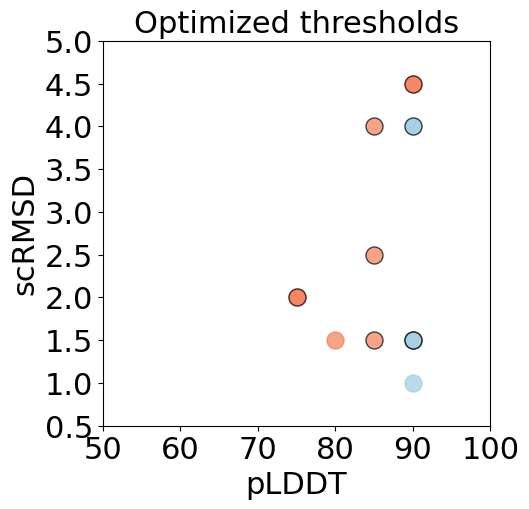

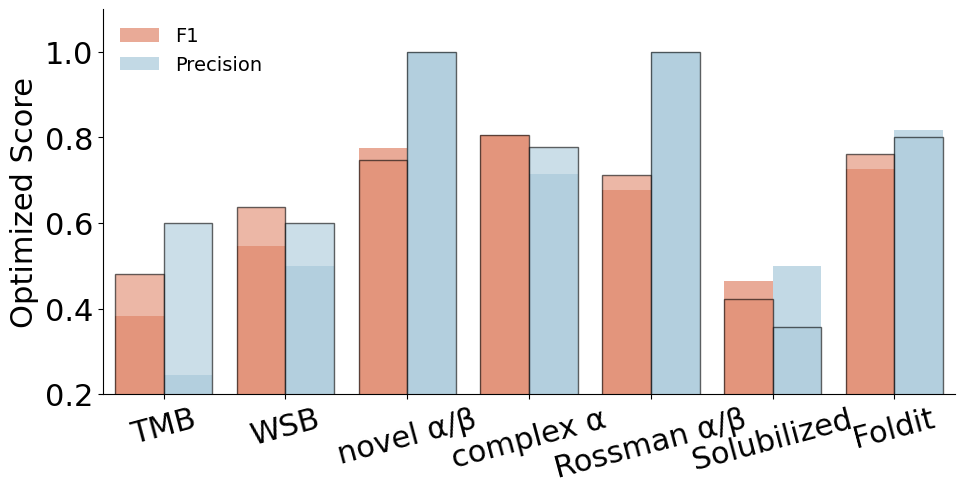

In [110]:
# ==============================
# Fig S6 — Optimal Thresholds 
# ==============================

palette = ['#f47d57', '#a1cbe2']
dataset_order = ['TMB','WSB','novel ⍺/β','complex ⍺','Rossman ⍺/β','Solubilized','Foldit']

df_benchmark_re48_ss = pd.read_csv(os.path.join(folder_data, 'Benchmark_AF2_ss_re48.csv'), index_col=0)
df_benchmark_re48_msa = pd.read_csv(os.path.join(folder_data, 'Benchmark_AF2_msa_re48.csv'), index_col=0)
df_benchmark_exp = pd.read_csv(os.path.join(folder_data, 'Benchmark_experimental.csv'), index_col=0)

x_vals_f1, y_vals_f1, f1_ss = optimize_cutoff(df_benchmark_re48_ss, df_benchmark_exp, dataset_order, metric='f1')
x_vals_f1_msa, y_vals_f1_msa, f1_msa = optimize_cutoff(df_benchmark_re48_msa, df_benchmark_exp, dataset_order, metric='f1')
x_vals_prec, y_vals_prec, prec_ss = optimize_cutoff(df_benchmark_re48_ss, df_benchmark_exp, dataset_order, metric='prec')
x_vals_prec_msa, y_vals_prec_msa, prec_msa = optimize_cutoff(df_benchmark_re48_msa, df_benchmark_exp, dataset_order, metric='prec')

# scatter plot with optimized thresholds
plt.figure(figsize=(5,5))
plt.scatter(x_vals_f1_msa, y_vals_f1_msa, color=palette[0], s=150, alpha=0.7)
plt.scatter(x_vals_prec_msa, y_vals_prec_msa, color=palette[1], s=150, alpha=0.7)
plt.scatter(x_vals_prec, y_vals_prec, color=palette[1], ec='black', lw=1, s=150, alpha=0.7)
plt.scatter(x_vals_f1, y_vals_f1, color=palette[0], ec='black', lw=1, s=150, alpha=0.7)
plt.xlim(50,100)
plt.ylim(0.5,5)
plt.title('Optimized thresholds', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('pLDDT', fontsize=22)
plt.ylabel('scRMSD', fontsize=22)
path_out_scatter = os.path.join('.','figures','figures_SI','Fig-S6-spread-thresholds-optimal.png')
plt.savefig(path_out_scatter, dpi=300, bbox_inches='tight')

# barplot of optimized precision and F1 score
fig, ax= plt.subplots(figsize=(11, 5))
df_f1 = pd.DataFrame({'metric':(len(f1_ss)+len(f1_msa))*['F1'], 'data':2*dataset_order,
              'type':len(f1_ss)*['ss']+len(f1_msa)*['msa'], 'score':f1_ss+f1_msa})
df_prec = pd.DataFrame({'metric':(len(prec_ss)+len(prec_msa))*['Precision'], 'data':2*dataset_order,
              'type':len(prec_ss)*['ss']+len(prec_msa)*['msa'], 'score':prec_ss+prec_msa})
df_barplot = pd.concat([df_f1, df_prec], ignore_index=True)
sns.barplot(data=df_barplot[df_barplot.type == 'msa'], x='data',y='score', hue='metric', alpha=0.7, palette=palette)
sns.barplot(data=df_barplot[df_barplot.type == 'ss'], x='data',y='score', hue='metric', alpha=0.6, palette=palette, legend=False, lw=1, ec='black')
ax.set_ylim(0.2, 1.1)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=22, rotation=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)
plt.xlabel('')
plt.ylabel('Optimized Score', fontsize=22)
plt.legend(frameon=False, fontsize=14, loc=2)
sns.despine()
path_out_bar = os.path.join('.','figures','figures_SI','Fig-S6-barplot-optimized-cutoffs.png')
plt.savefig(path_out_bar, bbox_inches='tight', dpi=300)

### Figure S7-8 ###
For Fig S7, The same data from Fig 3 and the same optimized thresholds reported in Fig S6 are used to plot the confusion matrices, now calculated using `get_maxscore()` directly. The resulting thresholds are used with the `make_confusion_matrix()` function to generate the corresponding confusion matrixes for each dataset. For Fig S8, the precision and F1 scores are calculated with the `heatmap_metric()` function across different threshold regimes, and the difference between the precision and F1 scores of AF2 ss and AF2 MSA are given as a heatmap with the `plot_heatmap()` function. 


TMB


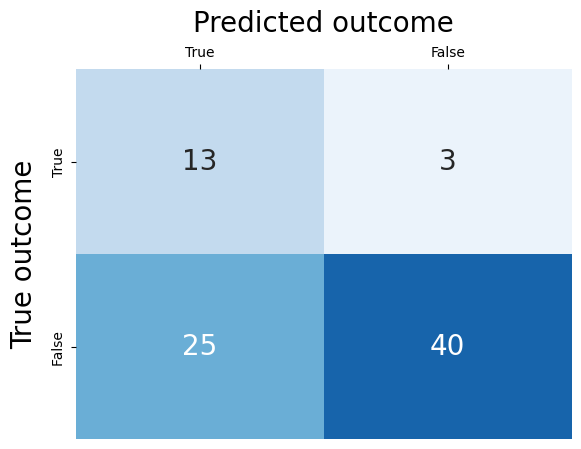

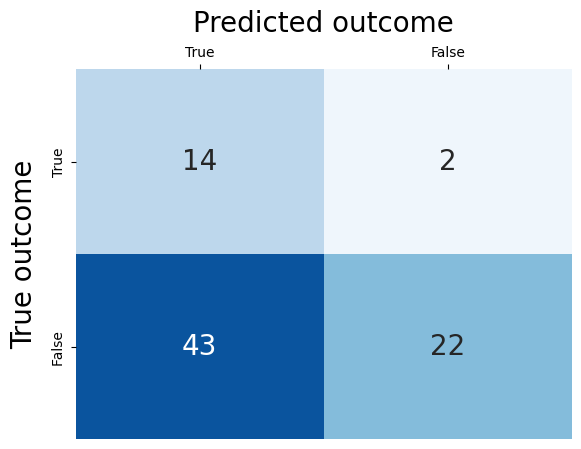

WSB


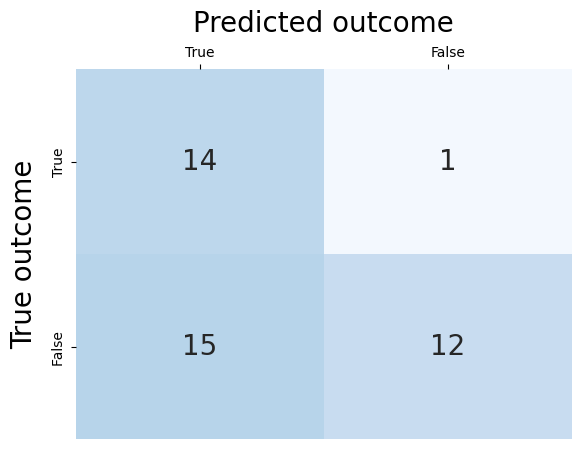

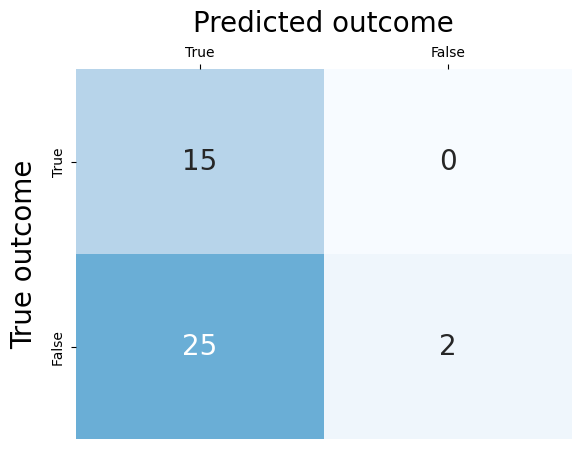

novel ⍺/β


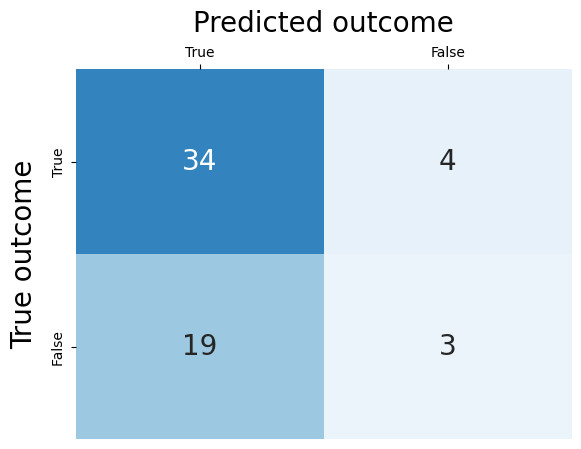

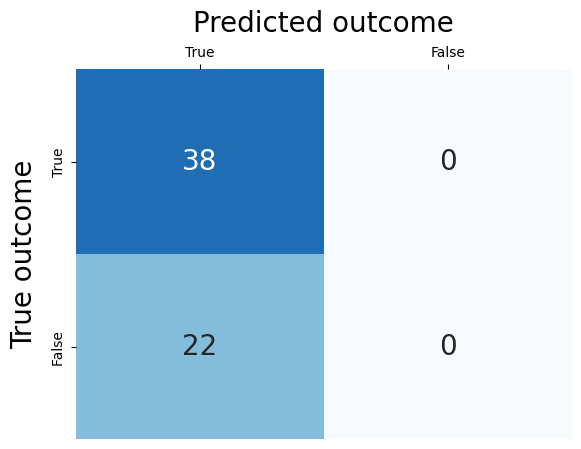

complex ⍺


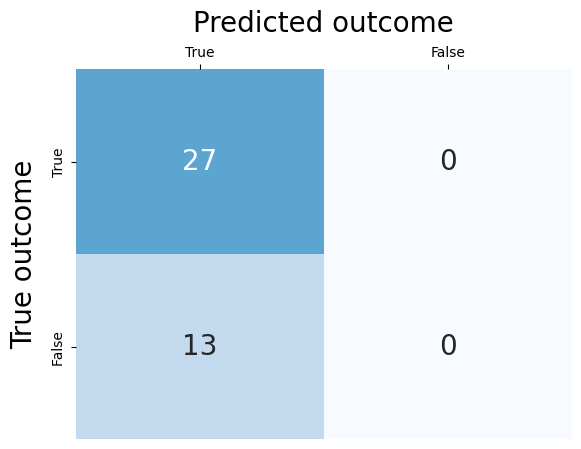

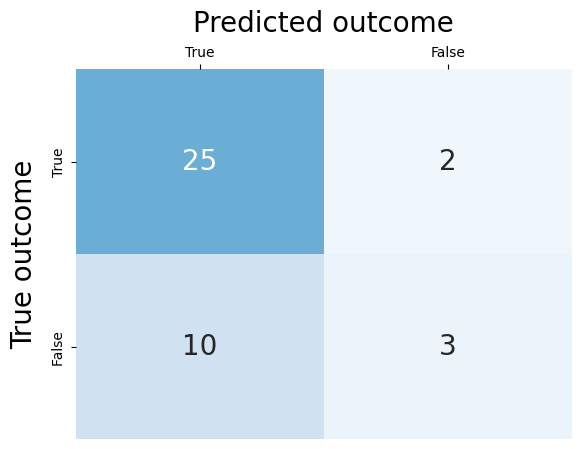

Rossman ⍺/β


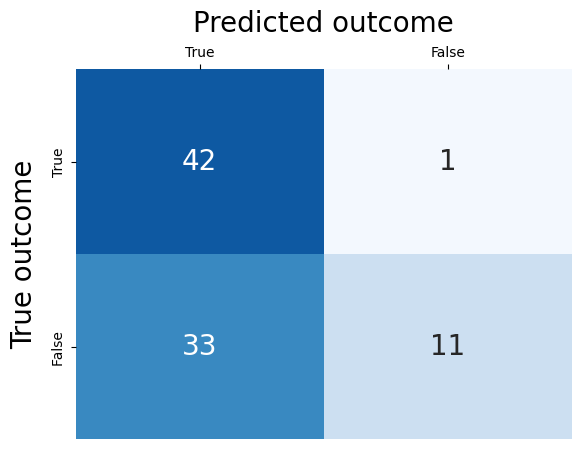

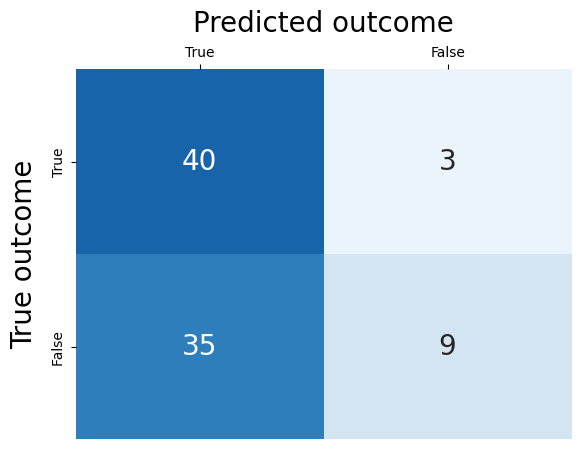

Solubilized


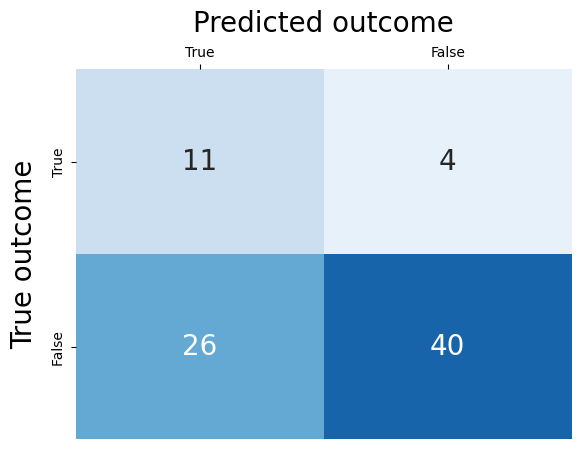

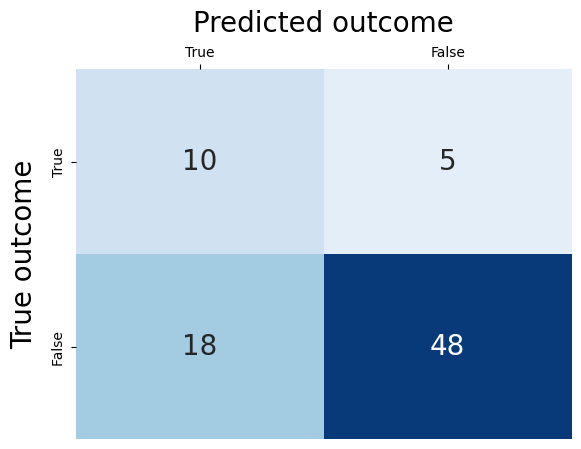

Foldit


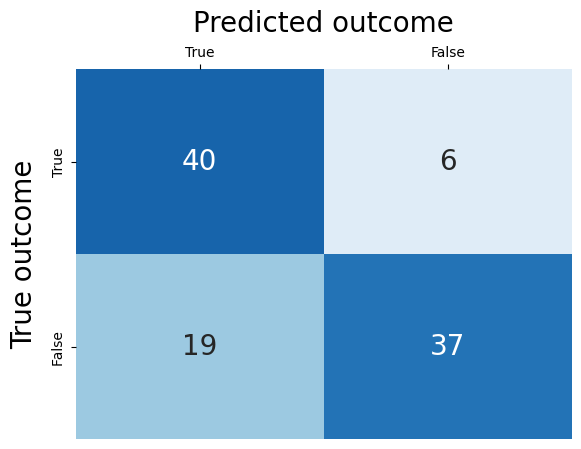

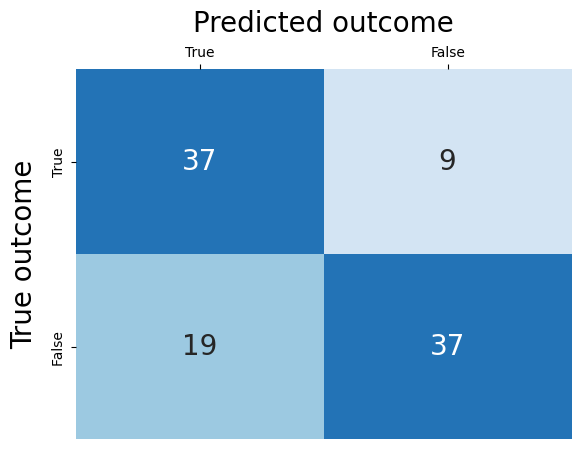

TMB


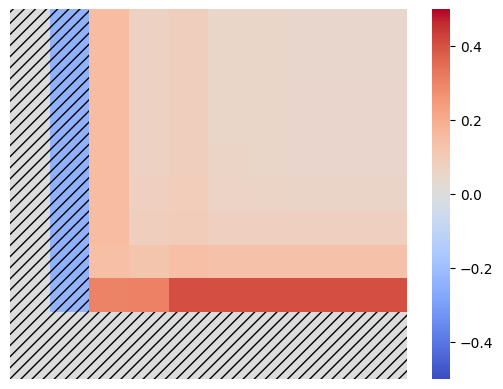

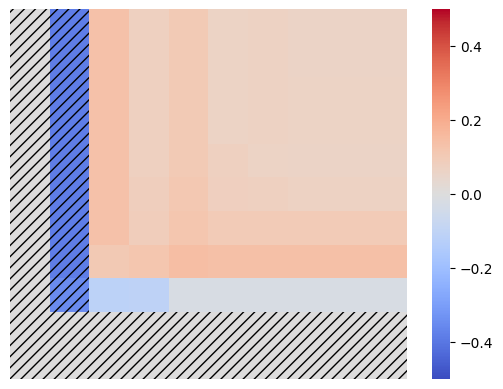

WSB


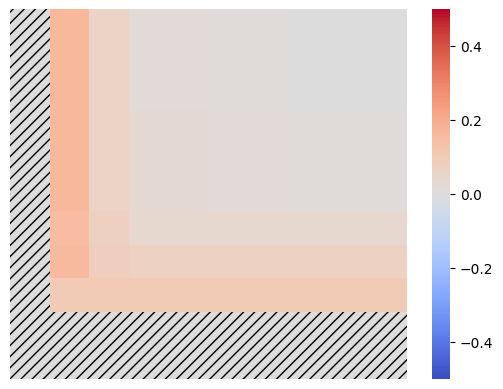

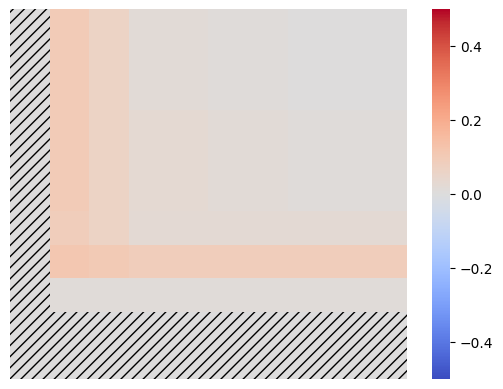

novel ⍺/β


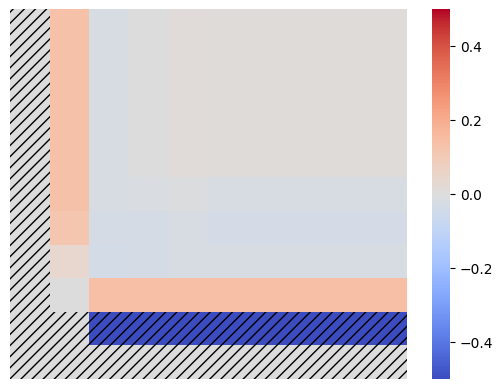

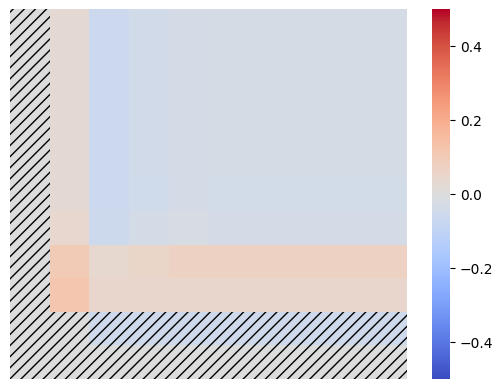

complex ⍺


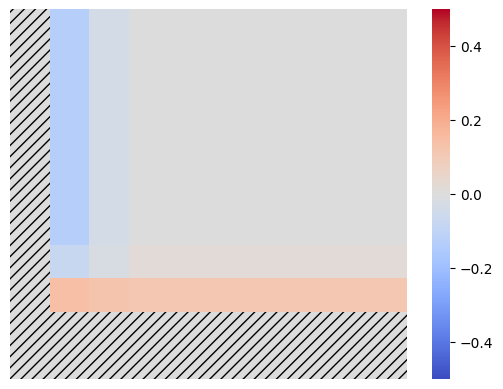

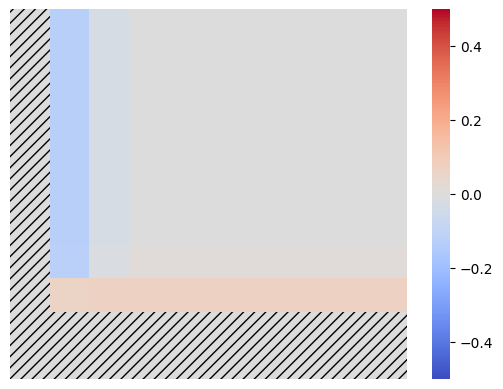

Rossman ⍺/β


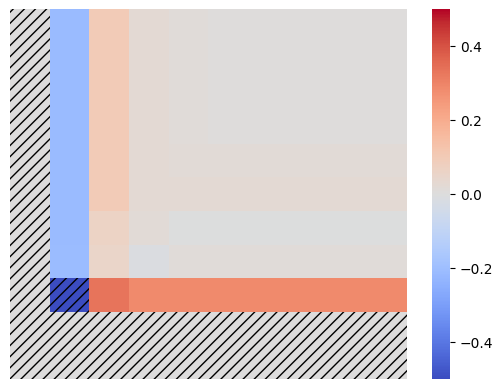

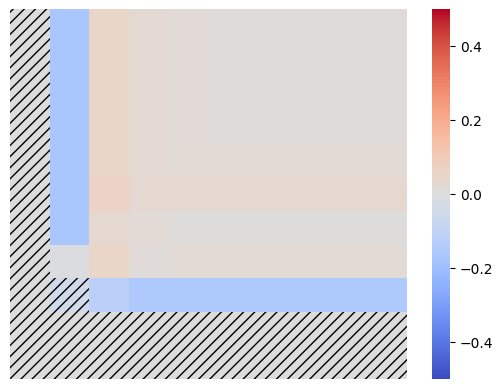

Solubilized


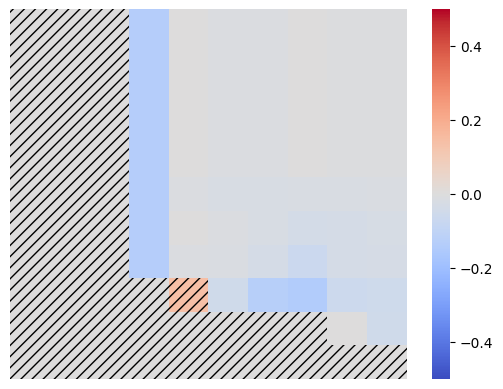

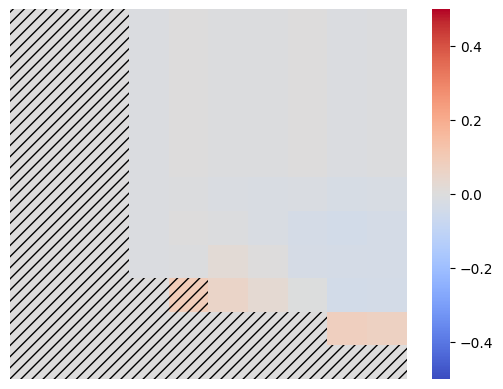

Foldit


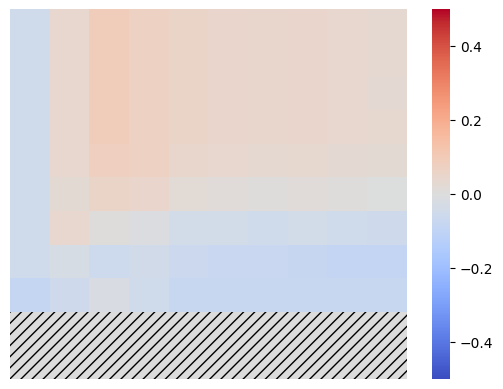

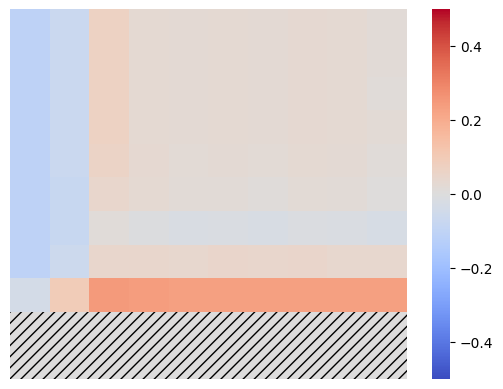

In [109]:
# ==============================
# Fig S7-8 — Optimal Thresholds 
# ==============================
dataset_order = ['TMB','WSB','novel ⍺/β','complex ⍺','Rossman ⍺/β','Solubilized','Foldit']
rmsd_range = np.arange(0.5,5.5, 0.5)
plddt_range = np.arange(50, 105, 5)

df_benchmark_re48_ss = pd.read_csv(os.path.join(folder_data, 'Benchmark_AF2_ss_re48.csv'), index_col=0)
df_benchmark_re48_msa = pd.read_csv(os.path.join(folder_data, 'Benchmark_AF2_msa_re48.csv'), index_col=0)
df_benchmark_exp = pd.read_csv(os.path.join(folder_data, 'Benchmark_experimental.csv'), index_col=0)

# plot confusion matrix with optimized thresholds for each dataset
for n in dataset_order:
    print(n)
    df_ss = df_benchmark_re48_ss[df_benchmark_re48_ss.data == n]
    df_msa =  df_benchmark_re48_msa[df_benchmark_re48_msa.data == n]
    best_ss = get_maxscore(df_benchmark_exp.loc[df_ss.index].monomeric.values, df_ss, rmsd_range, plddt_range, metric='f1', returnmax=True)
    best_msa = get_maxscore(df_benchmark_exp.loc[df_msa.index].monomeric.values, df_msa, rmsd_range, plddt_range, metric='f1', returnmax=True)
    pred_ss = ((df_ss.plddt.values >= best_ss[0]) & (df_ss.rmsd.values <= best_ss[1])).astype(int)
    pred_msa = ((df_msa.plddt.values >= best_msa[0]) & (df_msa.rmsd.values <= best_msa[1])).astype(int)
    path_ss_out = os.path.join('.','figures', 'figures_SI', 'Fig-S7-conf-{}-optimized-ss.png'.format(n.replace(' ', '_').replace('/','-')))
    path_msa_out = os.path.join('.','figures', 'figures_SI', 'Fig-S7-conf-{}-optimized-msa.png'.format(n.replace(' ', '_').replace('/','-')))
    make_confusion_matrix(df_benchmark_exp.loc[df_ss.index].monomeric.values, pred_ss, name_out=path_ss_out)
    make_confusion_matrix(df_benchmark_exp.loc[df_msa.index].monomeric.values, pred_msa, name_out=path_msa_out) 

# plot heatmap with difference between AF2 SS and AF2 MSA for each dataset
for n in dataset_order:
    print(n)
    df_ss = df_benchmark_re48_ss[df_benchmark_re48_ss.data == n]
    df_msa =  df_benchmark_re48_msa[df_benchmark_re48_msa.data == n]
    prec_ss, f1_ss, rec_ss = heatmap_metric(df_benchmark_exp.loc[df_ss.index].monomeric.values, df_ss, rmsd_range=rmsd_range, plddt_range=plddt_range)
    prec_msa, f1_msa, rec_msa = heatmap_metric(df_benchmark_exp.loc[df_msa.index].monomeric.values, df_msa, rmsd_range=rmsd_range, plddt_range=plddt_range)
    plot_heatmap(prec_ss-prec_msa, np.min([rec_ss, rec_msa], axis=0), plddt_range,rmsd_range, vmin=-0.5, vmax=0.5)
    prec_path_out = os.path.join('.','figures','figures_SI','Fig-S8-heatmap-prec-diff-{}.png'.format(n.replace(' ', '_').replace('/','-')))
    plt.savefig(prec_path_out, dpi=300, bbox_inches='tight')
    plt.show()
    plot_heatmap(f1_ss-f1_msa, np.min([rec_ss, rec_msa], axis=0), plddt_range,rmsd_range, vmin=-0.5, vmax=0.5)
    f1_path_out = os.path.join('.','figures','figures_SI','Fig-S8-heatmap-f1-diff-{}.png'.format(n.replace(' ', '_').replace('/','-')))
    plt.savefig(f1_path_out, dpi=300, bbox_inches='tight')
    plt.show()

### Figure S9 ###
For Fig S9, The secondary structure composition of the reference PDB or AFDB structures of the data used in Fig 5a are saved as `Designability_[...]_data_native.csv`. Besides these, a selection of random AFDB clusters not selected to be light or dark clusters is included in `AFDBclust_secstr_data_native.csv`
The resulting secondary structure percentages are plotted as boxplots. 

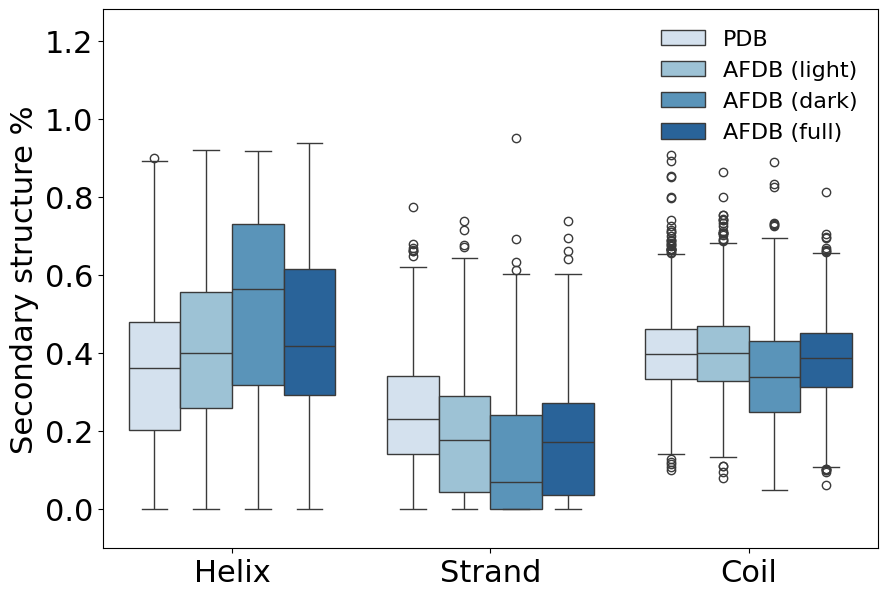

In [286]:
# ==============================
# Fig S9 — SecStr distributions 
# ==============================

scope_esmf_1000_nat = pd.read_csv(os.path.join(folder_data,'Designability_scopesmf_data_native.csv'), index_col=0)
lightclust_1000_nat = pd.read_csv(os.path.join(folder_data, 'Designability_lightclust_data_native.csv'), index_col=0)
darkclust_1000_nat = pd.read_csv(os.path.join(folder_data,'Designability_darkclust_data_native.csv'), index_col=0)
afdbclust_1000_nat = pd.read_csv(os.path.join(folder_data,'AFDBclust_secstr_data_native.csv'), index_col=0)

cols = ['pct_helixWT', 'pct_strandWT', 'pct_coilWT', 'type']
df_comb = pd.concat([scope_esmf_1000_nat[cols], lightclust_1000_nat[cols], darkclust_1000_nat[cols], afdbclust_1000_nat[cols]])
plt.figure(figsize=(10,7))
sns.boxplot(df_comb.melt(id_vars='type'), x='variable', y='value', hue='type', palette='Blues')
plt.xlabel('')
plt.xticks(ticks=[0,1,2],labels=['Helix','Strand','Coil'], fontsize=22)
plt.yticks(fontsize=22)
plt.ylim(-0.1,1.28)
plt.ylabel('Secondary structure %', fontsize=22)
plt.legend(loc=1, fontsize=16, frameon=False)
plt.savefig(os.path.join('.','figures','figures_SI','Fig-S9-secstr-darkclust-light-pdb.png'), dpi=300, bbox_inches='tight')